In [1]:
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [89]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data_1/dev_final_merge_ver3_ord.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data_1/eval_final_merge_ver3_ord.csv")

In [4]:
data_train

,line_id,red_count,red_mean_rev,channel_unique,red_type_unique,rev_type_unique,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,...,net_voice_min_ratio,net_voice_count_ratio,net_work_count,de_re_counts,reason_unique,de_re_channel_unique,de_re_channel_most_fre,de_re_reason_most_fre,date_observed,upgrade
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,1.785714,0.140554,1.0,1.0,1.0,4.0,0.0,0.0,2.0,...,3.622809,3.610768,0.460870,0.0,1,1,1.0,0.0,2021-03-14,yes
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,1.357143,0.714347,3.0,1.0,1.0,4.0,0.0,0.0,1.0,...,0.842409,-0.143698,0.460870,9.0,1,1,4.0,0.0,2021-03-10,yes
2,dd3a01a3-7baf-4605-9799-ce434328a20d,0.000000,-0.673488,1.0,1.0,1.0,4.0,0.0,0.0,2.0,...,1.009460,1.413393,0.365217,16.0,1,1,4.0,0.0,2021-03-10,no
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,-0.285714,-0.673488,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,-0.256004,-0.079145,-0.721739,0.0,1,1,1.0,0.0,2021-03-13,no
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,0.000000,1.002983,2.0,1.0,1.0,4.0,0.0,0.0,3.0,...,-0.225560,-0.341095,0.460870,1.0,1,1,4.0,0.0,2021-03-10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55863,f89b108a-f453-4419-a4dc-5bf8e1cd1f1a,-0.214286,3.326512,2.0,2.0,2.0,3.0,0.0,0.0,4.0,...,1.524308,2.208957,0.330435,4.0,2,2,1.0,0.0,2021-03-11,no
55864,b703f1d4-57ba-48b6-8adf-46d7aba6a406,1.285714,0.704600,3.0,1.0,1.0,0.0,0.0,0.0,2.0,...,-0.277452,-0.348591,0.460870,36.0,1,1,0.0,0.0,2021-03-13,no
55865,e3b2212c-906e-4a8f-8307-6b88fc64d7a0,-0.285714,0.208865,2.0,1.0,1.0,1.0,0.0,0.0,4.0,...,-0.484315,-0.536341,-0.652174,0.0,1,1,1.0,0.0,2021-03-11,no
55866,828df9bf-279c-47c3-96c2-92177a50b8fd,-0.285714,-1.120841,2.0,1.0,1.0,2.0,0.0,0.0,5.0,...,0.052661,0.262543,-0.678261,1.0,1,1,2.0,0.0,2021-03-14,no


In [2]:
hash_train = pd.read_csv(root_folder+"guohuan-li/new_data_1/dev_hash_merge.csv")
hash_val = pd.read_csv(root_folder+"guohuan-li/new_data_1/eval_hash_merge.csv")

In [153]:
hash_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   red_count         55868 non-null  float64
 1   red_mean_rev      55868 non-null  float64
 2   cus_used_days     55868 non-null  float64
 3   sus_count         55868 non-null  float64
 4   net_work_mean_kb  55868 non-null  float64
 5   net_work_count    55868 non-null  float64
 6   col_0             55868 non-null  int64  
 7   col_1             55868 non-null  int64  
 8   col_2             55868 non-null  int64  
 9   col_3             55868 non-null  int64  
 10  col_4             55868 non-null  int64  
 11  col_5             55868 non-null  int64  
 12  upgrade           55868 non-null  object 
dtypes: float64(6), int64(6), object(1)
memory usage: 5.5+ MB


In [154]:
hash_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   red_count         37155 non-null  float64
 1   red_mean_rev      37155 non-null  float64
 2   cus_used_days     37155 non-null  float64
 3   sus_count         37155 non-null  float64
 4   net_work_mean_kb  37155 non-null  float64
 5   net_work_count    37155 non-null  float64
 6   col_0             37155 non-null  int64  
 7   col_1             37155 non-null  int64  
 8   col_2             37155 non-null  int64  
 9   col_3             37155 non-null  int64  
 10  col_4             37155 non-null  int64  
 11  col_5             37155 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 3.4 MB


In [3]:
hash_y = hash_train['upgrade'].replace({'no':0,'yes':1})
hash_X = hash_train.drop(['upgrade'],axis = 1)

In [4]:
hash_X

,red_count,red_mean_rev,cus_used_days,sus_count,net_work_mean_kb,net_work_count,col_0,col_1,col_2,col_3,col_4,col_5
0,1.785714,0.147007,-3.416142,-0.181818,0.204743,0.460870,4,6,1,1,6,0
1,1.357143,0.745116,-0.058285,-0.181818,0.858832,0.460870,4,5,1,1,6,1
2,0.000000,-0.701531,-3.416142,0.090909,-0.036926,0.365217,5,4,3,0,4,2
3,-0.285714,-0.701531,-0.181331,-0.363636,0.078912,-0.721739,5,3,3,0,5,2
4,0.000000,1.045982,0.123046,1.000000,2.223418,0.460870,4,7,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
55863,-0.214286,0.000000,3.736709,-0.272727,-0.260398,0.330435,3,2,10,0,3,0
55864,1.285714,0.734955,-3.416142,0.090909,2.936256,0.460870,6,4,3,0,4,1
55865,-0.285714,0.218213,-3.416142,-0.363636,2.183958,-0.652174,3,0,14,0,1,0
55866,-0.285714,-1.167841,0.291424,-0.181818,-0.582868,-0.678261,3,7,0,1,7,0


In [90]:
data_train.head()

,line_id,red_count,red_mean_rev,channel_unique,red_type_unique,rev_type_unique,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,...,net_voice_min_ratio,net_voice_count_ratio,net_work_count,de_re_counts,reason_unique,de_re_channel_unique,de_re_channel_most_fre,de_re_reason_most_fre,date_observed,upgrade
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,1.785714,0.140554,1.0,1.0,1.0,4.0,0.0,0.0,2.0,...,3.622809,3.610768,0.460870,0.0,1,1,1.0,0.0,2021-03-14,yes
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,1.357143,0.714347,3.0,1.0,1.0,4.0,0.0,0.0,1.0,...,0.842409,-0.143698,0.460870,9.0,1,1,4.0,0.0,2021-03-10,yes
2,dd3a01a3-7baf-4605-9799-ce434328a20d,0.000000,-0.673488,1.0,1.0,1.0,4.0,0.0,0.0,2.0,...,1.009460,1.413393,0.365217,16.0,1,1,4.0,0.0,2021-03-10,no
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,-0.285714,-0.673488,2.0,1.0,1.0,0.0,0.0,0.0,2.0,...,-0.256004,-0.079145,-0.721739,0.0,1,1,1.0,0.0,2021-03-13,no
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,0.000000,1.002983,2.0,1.0,1.0,4.0,0.0,0.0,3.0,...,-0.225560,-0.341095,0.460870,1.0,1,1,4.0,0.0,2021-03-10,yes


In [91]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    55868 non-null  object 
 1   red_count                  55868 non-null  float64
 2   red_mean_rev               55868 non-null  float64
 3   channel_unique             55868 non-null  float64
 4   red_type_unique            55868 non-null  float64
 5   rev_type_unique            55868 non-null  float64
 6   channel_most_fre           55868 non-null  float64
 7   red_type_most_fre          55868 non-null  float64
 8   rev_type_most_fre          55868 non-null  float64
 9   cpu_cores                  55868 non-null  float64
 10  expandable_storage         55868 non-null  float64
 11  gsma_device_type           55868 non-null  float64
 12  gsma_model_name            55868 non-null  float64
 13  gsma_operating_system      55868 non-null  flo

In [92]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    37155 non-null  object 
 1   red_count                  37155 non-null  float64
 2   red_mean_rev               37155 non-null  float64
 3   channel_unique             37155 non-null  float64
 4   red_type_unique            37155 non-null  float64
 5   rev_type_unique            37155 non-null  float64
 6   channel_most_fre           37155 non-null  float64
 7   red_type_most_fre          37155 non-null  float64
 8   rev_type_most_fre          37155 non-null  float64
 9   cpu_cores                  37155 non-null  float64
 10  expandable_storage         37155 non-null  float64
 11  gsma_device_type           37155 non-null  float64
 12  gsma_model_name            37155 non-null  float64
 13  gsma_operating_system      37155 non-null  flo

In [93]:
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','date_observed','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id','date_observed'],axis = 1)

In [29]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data_1/dev_final_merge_ver3_ord.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data_1/eval_final_merge_ver3_ord.csv")

data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','date_observed','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id','date_observed'],axis = 1)

print(data_X.info())
print(data_val_X.info())



## top20 features dataset

## LR

In [51]:
data_train_one = pd.read_csv(root_folder+"guohuan-li/new_data_1/dev_final_merge_ver3.csv")
data_eval_one = pd.read_csv(root_folder+"guohuan-li/new_data_1/eval_final_merge_ver3.csv")

In [52]:
use_features = ['net_work_count',
 'red_count',
 'net_sms_mean_sum',
 'net_voice_min_mean_sum',
 'sus_count',
 'de_re_counts',
 'red_mean_rev',
 'net_voice_count_mean_sum',
 'net_mms_mean_sum',
 'net_work_mean_kb',
 'net_sms_ratio',
 'net_voice_count_ratio',
 'net_voice_min_ratio',
 'net_mms_ratio',
 'gsma_model_name',
 'internal_storage_capacity',
 'channel_unique',
 'channel_most_fre',
 'total_ram',
 'year_released']
num_features = ['net_work_count',
 'red_count',
 'net_sms_mean_sum',
 'net_voice_min_mean_sum',
 'sus_count',
 'de_re_counts',
 'red_mean_rev',
 'net_voice_count_mean_sum',
 'net_mms_mean_sum',
 'net_work_mean_kb',
 'net_sms_ratio',
 'net_voice_count_ratio',
 'net_voice_min_ratio',
 'net_mms_ratio',
 'channel_unique',]
data_train_one_top20 = data_train_one[use_features]
data_eval_one_top20 = data_eval_one[use_features]
data_train_one['upgrade'].replace({'yes':1,'no':0},inplace=True)
data_train_one_top20['upgrade'] = data_train_one['upgrade']
data_eval_one_top20['line_id'] = data_eval_one['line_id']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
data_train_one_top20.to_csv(root_folder+"guohuan-li/new_data_1/train_top20.csv")
data_eval_one_top20.to_csv(root_folder+"guohuan-li/new_data_1/eval_top20.csv")

In [54]:
data_eval_one_top20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   net_work_count             37155 non-null  float64
 1   red_count                  37155 non-null  float64
 2   net_sms_mean_sum           37155 non-null  float64
 3   net_voice_min_mean_sum     37155 non-null  float64
 4   sus_count                  37155 non-null  float64
 5   de_re_counts               37155 non-null  float64
 6   red_mean_rev               37155 non-null  float64
 7   net_voice_count_mean_sum   37155 non-null  float64
 8   net_mms_mean_sum           37155 non-null  float64
 9   net_work_mean_kb           37155 non-null  float64
 10  net_sms_ratio              37155 non-null  float64
 11  net_voice_count_ratio      37155 non-null  float64
 12  net_voice_min_ratio        37155 non-null  float64
 13  net_mms_ratio              37155 non-null  flo

In [53]:
data_train_one_top20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   net_work_count             55868 non-null  float64
 1   red_count                  55868 non-null  float64
 2   net_sms_mean_sum           55868 non-null  float64
 3   net_voice_min_mean_sum     55868 non-null  float64
 4   sus_count                  55868 non-null  float64
 5   de_re_counts               55868 non-null  float64
 6   red_mean_rev               55868 non-null  float64
 7   net_voice_count_mean_sum   55868 non-null  float64
 8   net_mms_mean_sum           55868 non-null  float64
 9   net_work_mean_kb           55868 non-null  float64
 10  net_sms_ratio              55868 non-null  float64
 11  net_voice_count_ratio      55868 non-null  float64
 12  net_voice_min_ratio        55868 non-null  float64
 13  net_mms_ratio              55868 non-null  flo

In [57]:
from category_encoders import BinaryEncoder
import pandas as pd

data_train_one_top20 = pd.read_csv(root_folder+"guohuan-li/new_data_1/train_top20.csv")
data_eval_one_top20 = pd.read_csv(root_folder+"guohuan-li/new_data_1/eval_top20.csv")

use_features = ['net_work_count','red_count',
 'net_sms_mean_sum',
 'net_voice_min_mean_sum',
 'sus_count',
 'de_re_counts',
 'red_mean_rev',
 'net_voice_count_mean_sum',
 'net_mms_mean_sum',
 'net_work_mean_kb',
 'net_sms_ratio',
 'net_voice_count_ratio',
 'net_voice_min_ratio',
 'net_mms_ratio',
 'gsma_model_name',
 'internal_storage_capacity',
 'channel_unique',
 'channel_most_fre',
 'total_ram',
 'year_released']

data_train = data_train_one_top20[use_features]
data_val = data_eval_one_top20[use_features]
data_y = data_train_one_top20['upgrade']
cat_features = ['gsma_model_name','internal_storage_capacity','channel_most_fre','total_ram','year_released']

data_train = BinaryEncoder(cols=cat_features).fit_transform(data_train)
data_val = BinaryEncoder(cols=cat_features).fit_transform(data_val)

#Logistic regression
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','lbfgs']}
LR = LogisticRegression()
CV_LR = GridSearchCV(estimator=LR, param_grid=param_grid, cv= 5,verbose=True,n_jobs=-1,scoring = 'f1')
CV_LR.fit(data_train,data_y)
print(CV_LR.best_params_)
print(CV_LR.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.7min finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6271885645078541

In [40]:
data_train_binary_top20

,net_work_count,red_count,net_sms_mean_sum,net_voice_min_mean_sum,sus_count,de_re_counts,red_mean_rev,net_voice_count_mean_sum,net_mms_mean_sum,net_work_mean_kb,...,channel_most_fre_2,channel_most_fre_3,total_ram_0,total_ram_1,total_ram_2,total_ram_3,year_released_0,year_released_1,year_released_2,year_released_3
0,0.460870,1.785714,-0.096458,-0.456024,-0.166667,0.0,0.140554,-0.565115,3.736558,0.174131,...,0,1,0,0,0,1,0,0,0,1
1,0.460870,1.357143,-0.247298,-0.203729,-0.166667,9.0,0.714347,0.021696,0.024210,0.730424,...,0,1,0,0,1,0,0,0,1,0
2,0.365217,0.000000,0.139867,-0.329391,0.083333,16.0,-0.673488,-0.285905,-0.141365,-0.031405,...,0,1,0,0,1,1,0,0,1,1
3,-0.721739,-0.285714,1.774341,1.022377,-0.333333,0.0,-0.673488,-0.033023,3.747770,0.067113,...,1,0,0,0,1,1,0,0,1,1
4,0.460870,0.000000,0.409303,0.495750,0.916667,1.0,1.002983,0.492756,0.526633,1.890986,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55863,0.330435,-0.214286,0.547764,0.460206,-0.250000,4.0,3.326512,1.876195,-0.121696,-0.221465,...,0,1,0,1,0,0,0,1,0,0
55864,0.460870,1.285714,3.708982,0.657836,0.083333,36.0,0.704600,0.580324,3.747770,2.497244,...,1,0,0,0,1,0,0,0,1,1
55865,-0.652174,-0.285714,0.930732,-0.010194,-0.333333,0.0,0.208865,0.356254,-0.018732,1.857425,...,1,1,0,1,0,0,0,1,0,0
55866,-0.678261,-0.285714,0.447944,2.069716,-0.166667,1.0,-1.120841,2.237988,-0.324695,-0.495721,...,0,0,0,0,0,1,0,0,1,0


In [47]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','lbfgs']}
LR = LogisticRegression()
CV_LR = GridSearchCV(estimator=LR, param_grid=param_grid, cv= 5,verbose=True,n_jobs=-1,scoring = 'f1')
CV_LR.fit(data_train_binary_top20,data_y)
CV_LR.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.7min finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'lbfgs'}

In [48]:
CV_LR.best_score_

0.626760941714397

## ababoost

In [75]:
#Adaboost
#with top 20 RFC selected features
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,2,10, 50],#1,2
              'learning_rate' : [ 0.0001,0.01, 0.1, 1.0]
             }

CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 5,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X[use_features],data_y)
CV_abc.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.1,
 'n_estimators': 50}

In [76]:
#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = 13,min_samples_split=210)
CV_abc.best_score_

0.7631703745231446

In [62]:
#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)
CV_abc.best_score_

0.7870553261744075

In [94]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)
ABC.fit(data_X[use_features],data_y)
pred = ABC.predict(data_val_X[use_features])
submission = pd.DataFrame(data_val['line_id'])
submission['upgrade'] = pred
teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'
submission_path=root_folder+"submission/2021-04-18.csv"
submission.to_csv(submission_path,header=True,index=None)

In [96]:
submission['upgrade'].value_counts()

0    28479
1     8676
Name: upgrade, dtype: int64

In [87]:
data_val

,net_work_count,red_count,net_sms_mean_sum,net_voice_min_mean_sum,sus_count,de_re_counts,red_mean_rev,net_voice_count_mean_sum,net_mms_mean_sum,net_work_mean_kb,...,channel_most_fre_2,channel_most_fre_3,total_ram_0,total_ram_1,total_ram_2,total_ram_3,year_released_0,year_released_1,year_released_2,year_released_3
0,0.452174,1.857143,-0.309957,0.491475,-0.090909,1.0,0.107049,1.066884,0.291755,0.475142,...,0,1,0,0,0,1,0,0,0,1
1,0.452174,2.214286,0.891532,-0.213936,-0.363636,0.0,-0.024299,-0.234613,1.106134,0.855365,...,1,0,0,0,1,0,0,0,1,0
2,0.121739,-0.214286,0.431533,-0.263097,0.090909,16.0,0.194615,-0.407184,-0.194953,-0.173624,...,0,1,0,0,0,1,0,0,1,1
3,0.356522,3.000000,-0.408053,1.997272,-0.272727,0.0,-2.459720,0.057253,-0.316742,-0.493031,...,1,1,0,0,1,1,0,1,0,0
4,-0.347826,-0.214286,0.990285,-0.120098,-0.272727,9.0,-0.097271,-0.039807,0.385130,-0.459376,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37150,-0.930435,-0.357143,3.717026,1.379366,-0.363636,0.0,0.194615,1.578151,0.193062,0.372145,...,1,1,0,0,1,1,0,1,0,0
37151,-0.982609,-0.357143,0.002583,0.592179,-0.363636,0.0,-0.681042,0.307424,-0.206938,-0.485769,...,0,1,0,0,1,1,0,1,0,0
37152,-0.782609,-0.285714,-0.103678,-0.415953,-0.363636,0.0,-0.977890,-0.380129,3.753846,0.170226,...,0,1,0,0,1,0,0,0,0,1
37153,0.443478,0.642857,-0.146531,0.508550,0.363636,36.0,0.475292,-0.138933,-0.238530,-0.301749,...,0,0,0,0,0,1,0,0,1,1


In [65]:
#Adaboost 
#with all features

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,2,10, 50],#1,2
              'learning_rate' : [ 0.0001,0.01, 0.1, 1.0]
             }

CV_abc_all = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 5,n_jobs=-1,scoring = 'f1')
CV_abc_all.fit(data_X,data_y)
CV_abc_all.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.0001,
 'n_estimators': 50}

In [66]:
CV_abc_all.best_score_

0.7818433732299106

## SVM

In [80]:
from sklearn.svm import SVC

SVM = SVC()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]
CV_svm = GridSearchCV(estimator=SVM, param_grid=tuned_parameters, cv= 5,n_jobs=-1,scoring = 'f1')
CV_svm.fit(data_train,data_y)
CV_svm.best_params_

KeyboardInterrupt: 

In [ ]:
CV_svm.best_score_

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
CV_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
CV_knn.fit(data_train,data_y)
CV_knn.best_params_

In [ ]:
CV_knn.best_score_

## XGboost

In [ ]:
import xgboost as xgb
# A parameter grid for XGBoost
xgb_model = xgb.XGBClassifier()

params = {
        'min_child_weight': [1,  10],
        'gamma': [0.5, 1, 2, 5],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 5,None]
        }

CV_xgb = GridSearchCV(xgb_model, params, n_jobs=5, 
                   cv=5, 
                   scoring='f1')
CV_xgb.fit(data_X[use_features],data_y)
CV_xgb.best_params_

In [ ]:
CV_xgb.best_score_

## Decision tree

In [71]:
parameters={'min_samples_split' : range(10,500,50),'max_depth': range(1,20,4)}
DT=DecisionTreeClassifier()
CV_dt=GridSearchCV(DT,parameters,cv=5,scoring='f1')
CV_dt.fit(data_X[use_features],data_y)
CV_dt.best_params_

{'max_depth': 13, 'min_samples_split': 210}

In [72]:
CV_dt.best_score_

0.6946094378022469

## Neural Net

In [78]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier()
parameters = {'solver': ['lbfgs'], 'max_iter': [100,500,1000,1500,1800,2000,2200,2500]}
CV_nn = GridSearchCV(NN, parameters, cv = 5,n_jobs=-1,scoring='f1')
CV_nn.fit(data_train,data_y)
CV_nn.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'max_iter': 2200, 'solver': 'lbfgs'}

In [79]:
CV_nn.best_score_

0.7095403364899942

In [ ]:
CV_nn.best_score_

## Majority vote

In [ ]:
final_vote_clf = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='hard', weights=[2,1,1])

In [ ]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)

NN = MLPClassifier(solver='lbfgs',max_iter=1500)

RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=40)
#model2 = KNeighborsClassifier()
#model3= LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,train_size=0.8)

ABC.fit(data_X[use_features],data_y)
NN.fit(data_train,data_y)
RFC.fit(data_X[use_features],data_y)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [60]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   red_count                  55868 non-null  float64
 1   red_mean_rev               55868 non-null  float64
 2   channel_unique             55868 non-null  float64
 3   red_type_unique            55868 non-null  float64
 4   rev_type_unique            55868 non-null  float64
 5   channel_most_fre           55868 non-null  float64
 6   red_type_most_fre          55868 non-null  float64
 7   rev_type_most_fre          55868 non-null  float64
 8   cpu_cores                  55868 non-null  float64
 9   expandable_storage         55868 non-null  float64
 10  gsma_device_type           55868 non-null  float64
 11  gsma_model_name            55868 non-null  float64
 12  gsma_operating_system      55868 non-null  float64
 13  internal_storage_capacity  55868 non-null  flo

In [37]:
for i in data_train_one_top20.columns:
    print(i)
    print(data_train_one_top20[i].value_counts())
    print()

net_work_count
 0.460870    10316
 0.452174     2302
-0.973913     1113
 0.443478     1079
 0.434783      779
             ...  
-1.052174       51
-1.086957       44
-1.069565       42
-1.078261       36
-1.095652       30
Name: net_work_count, Length: 181, dtype: int64

red_count
-0.357143    10717
-0.285714     6505
-0.214286     4261
-0.142857     2575
-0.071429     2462
 0.000000     2149
 0.071429     1892
 0.142857     1769
 0.214286     1588
 0.285714     1511
 0.357143     1369
 0.428571     1255
 0.500000     1149
 0.571429      988
 0.642857      988
 3.000000      931
 0.714286      884
 0.785714      775
 0.857143      714
 0.928571      686
 1.142857      635
 1.000000      622
 1.071429      605
 1.214286      562
 1.285714      520
 1.357143      499
 1.428571      482
 1.500000      429
 1.571429      413
 1.714286      348
 1.642857      340
 1.785714      327
 2.071429      325
 2.357143      325
 1.928571      323
 1.857143      323
 2.214286      315
 2.285714     

In [30]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   red_count                  55868 non-null  float64
 1   red_mean_rev               55868 non-null  float64
 2   channel_unique             55868 non-null  float64
 3   red_type_unique            55868 non-null  float64
 4   rev_type_unique            55868 non-null  float64
 5   channel_most_fre           55868 non-null  float64
 6   red_type_most_fre          55868 non-null  float64
 7   rev_type_most_fre          55868 non-null  float64
 8   cpu_cores                  55868 non-null  float64
 9   expandable_storage         55868 non-null  float64
 10  gsma_device_type           55868 non-null  float64
 11  gsma_model_name            55868 non-null  float64
 12  gsma_operating_system      55868 non-null  float64
 13  internal_storage_capacity  55868 non-null  flo

In [10]:
data_val_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   red_count                  37155 non-null  float64
 1   red_mean_rev               37155 non-null  float64
 2   channel_unique             37155 non-null  float64
 3   red_type_unique            37155 non-null  float64
 4   rev_type_unique            37155 non-null  float64
 5   channel_most_fre           37155 non-null  float64
 6   red_type_most_fre          37155 non-null  float64
 7   rev_type_most_fre          37155 non-null  float64
 8   cpu_cores                  37155 non-null  float64
 9   expandable_storage         37155 non-null  float64
 10  gsma_device_type           37155 non-null  float64
 11  gsma_model_name            37155 non-null  float64
 12  gsma_operating_system      37155 non-null  float64
 13  internal_storage_capacity  37155 non-null  flo

In [16]:
list(data_train.columns[3:]) not in list(data_val.columns[1:])

True

In [17]:
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])

In [109]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

#drop some features not in both datasets
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(train_lst,val_lst)
data_train.drop(drop_lst, axis=1,inplace=True)
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(val_lst,train_lst)
data_val.drop(drop_lst, axis=1,inplace=True)

#extract the training data
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','upgrade_date','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id'],axis = 1)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression(max_iter=500)
MLP = MLPClassifier(max_iter = 500)
SVM = SVC()

clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']

from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']

#for i in range(len(names)):
#    scores  = cross_validate(clfs[i],data_X,data_y,cv = 10,scoring = scoring,return_train_score=True)
#    print(f'The model {names[i]} f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')
#    print()


AttributeError: 'NoneType' object has no attribute 'set_params'

In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVM = SVC()

clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']

from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']

In [94]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    55868 non-null  object 
 1   red_count                  55868 non-null  float64
 2   red_mean_rev               55868 non-null  float64
 3   channel_most_fre           55868 non-null  float64
 4   red_type_most_fre          55868 non-null  float64
 5   rev_type_most_fre          55868 non-null  float64
 6   cpu_cores                  55868 non-null  float64
 7   expandable_storage         55868 non-null  float64
 8   gsma_device_type           55868 non-null  float64
 9   gsma_model_name            55868 non-null  float64
 10  gsma_operating_system      55868 non-null  float64
 11  internal_storage_capacity  55868 non-null  float64
 12  lte_advanced               55868 non-null  float64
 13  lte_category               55868 non-null  flo

In [12]:
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','date_observed','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id','date_observed'],axis = 1)

In [55]:
data_X

,red_count,red_mean_rev,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,...,os_version,sim_size,total_ram,year_released,cus_used_days,plan_name,carrier,sus_count,net_work_mean_kb,net_work_count
0,1.785714,0.147007,4.0,0.0,0.0,2.0,1.0,0.0,5.0,0.0,...,7.0,0.0,5.0,3.0,-3.416142,1.0,0.0,-0.181818,0.204743,0.460870
1,1.357143,0.745116,4.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,...,2.0,0.0,2.0,4.0,-0.058285,2.0,0.0,-0.181818,0.858832,0.460870
2,0.000000,-0.701531,4.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,2.0,-3.416142,1.0,0.0,0.090909,-0.036926,0.365217
3,-0.285714,-0.701531,3.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,2.0,-0.181331,1.0,0.0,-0.363636,0.078912,-0.721739
4,0.000000,1.045982,4.0,0.0,0.0,3.0,1.0,0.0,5.0,0.0,...,3.0,0.0,5.0,4.0,0.123046,1.0,0.0,1.000000,2.223418,0.460870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55863,-0.214286,0.000000,3.0,0.0,0.0,4.0,2.0,0.0,5.0,0.0,...,6.0,1.0,4.0,6.0,3.736709,1.0,0.0,-0.272727,-0.260398,0.330435
55864,1.285714,0.734955,0.0,0.0,0.0,2.0,0.0,0.0,5.0,1.0,...,0.0,0.0,2.0,2.0,-3.416142,1.0,0.0,0.090909,2.936256,0.460870
55865,-0.285714,0.218213,1.0,0.0,0.0,4.0,2.0,1.0,4.0,2.0,...,6.0,1.0,4.0,6.0,-3.416142,1.0,0.0,-0.363636,2.183958,-0.652174
55866,-0.285714,-1.167841,2.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,...,4.0,0.0,5.0,4.0,0.291424,2.0,0.0,-0.181818,-0.582868,-0.678261


In [56]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55868 entries, 0 to 55867
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   red_count                  55868 non-null  float64
 1   red_mean_rev               55868 non-null  float64
 2   channel_most_fre           55868 non-null  float64
 3   red_type_most_fre          55868 non-null  float64
 4   rev_type_most_fre          55868 non-null  float64
 5   cpu_cores                  55868 non-null  float64
 6   expandable_storage         55868 non-null  float64
 7   gsma_device_type           55868 non-null  float64
 8   gsma_model_name            55868 non-null  float64
 9   gsma_operating_system      55868 non-null  float64
 10  internal_storage_capacity  55868 non-null  float64
 11  lte_advanced               55868 non-null  float64
 12  lte_category               55868 non-null  float64
 13  os_family                  55868 non-null  flo

In [57]:
data_val_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   red_count                  37155 non-null  float64
 1   red_mean_rev               37155 non-null  float64
 2   channel_most_fre           37155 non-null  float64
 3   red_type_most_fre          37155 non-null  float64
 4   rev_type_most_fre          37155 non-null  float64
 5   cpu_cores                  37155 non-null  float64
 6   expandable_storage         37155 non-null  float64
 7   gsma_device_type           37155 non-null  float64
 8   gsma_model_name            37155 non-null  float64
 9   gsma_operating_system      37155 non-null  float64
 10  internal_storage_capacity  37155 non-null  float64
 11  lte_advanced               37155 non-null  float64
 12  lte_category               37155 non-null  float64
 13  os_family                  37155 non-null  flo

In [3]:
import numpy as np
import pandas as pd

teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

#drop some features not in both datasets
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(train_lst,val_lst)
data_train.drop(drop_lst, axis=1,inplace=True)
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(val_lst,train_lst)
data_val.drop(drop_lst, axis=1,inplace=True)

In [10]:
data_val.iloc[:,1:]

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.343750,0.072165,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.000872,0.000237,0.012822,0.011754,0.001293,0.017045,0.035513,0.045832,0.018568
1,0.046875,0.163476,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.002608,0.000168,0.003904,0.003428,0.001087,0.000508,0.014588,0.000197,0.004587
2,0.164062,0.075211,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.004670,0.004449,0.139339,0.130237,0.007121,0.060105,0.082680,0.018683,0.006547
3,0.125000,0.057611,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.001165,0.000120,0.015224,0.008857,0.003790,0.012247,0.064468,0.012884,0.017049
4,0.265625,0.090074,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.005199,0.027256,0.017265,0.002377,0.064312,0.014482,0.041124,0.009324,0.009494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,0.070312,0.063918,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003007,0.003678,0.029917,0.035271,0.027462,0.022154,0.078836,0.012268,0.014641
12740,0.265625,0.052725,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.012750,0.003659,0.057319,0.076913,0.005780,0.013219,0.032109,0.008480,0.007520
12741,0.343750,0.070607,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000955,0.000303,0.010649,0.008325,0.016477,0.001376,0.003090,0.001978,0.000788
12742,0.023438,0.082907,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.003373,0.000890,0.122693,0.069080,0.221589,0.034388,0.068129,0.008050,0.006131


In [4]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              12744 non-null  object 
 1   red_count                            12744 non-null  float64
 2   red_mean_rev                         12744 non-null  float64
 3   channel_unique                       12744 non-null  float64
 4   red_type_unique                      12744 non-null  float64
 5   red_type_most_fre_MPPAID             12744 non-null  float64
 6   red_type_most_fre_PAID               12744 non-null  float64
 7   red_type_most_fre_Replacement        12744 non-null  float64
 8   channel_most_fre_APP                 12744 non-null  float64
 9   channel_most_fre_HANDSET             12744 non-null  float64
 10  channel_most_fre_IVR                 12744 non-null  float64
 11  channel_most_fre_RTR        

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              19359 non-null  object 
 1   upgrade_date                         19359 non-null  object 
 2   upgrade                              19359 non-null  object 
 3   red_count                            19359 non-null  float64
 4   red_mean_rev                         19359 non-null  float64
 5   channel_unique                       19359 non-null  float64
 6   red_type_unique                      19359 non-null  float64
 7   red_type_most_fre_MPPAID             19359 non-null  float64
 8   red_type_most_fre_PAID               19359 non-null  float64
 9   red_type_most_fre_Replacement        19359 non-null  float64
 10  channel_most_fre_APP                 19359 non-null  float64
 11  channel_most_fre_HANDSET    

In [112]:
#Adaboost
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,10, 50, 100, 500],#1,2
              'learning_rate' : [0.001, 0.01, 0.1, 1.0]
             }

ABC = AdaBoostClassifier(max_features = "auto", class_weight = "auto",max_depth = None)
CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

AttributeError: 'NoneType' object has no attribute 'set_params'

In [110]:
data_X

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.146179,0.011694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040279,0.014616,0.003699,0.000865
1,0.122924,0.055288,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.007654,0.001790,0.003529,0.003105,0.004315,0.020009,0.018758,0.002877,0.005149
2,0.013289,0.049344,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.010001,0.012862,0.001296,0.001285,0.004141,0.078985,0.054777,0.016367,0.011887
3,0.089701,0.066824,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.001775,0.001468,0.000557,0.000567,0.004532,0.013643,0.015461,0.008836,0.004643
4,0.029900,0.067227,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.006400,0.003024,0.001463,0.001035,0.013455,0.042141,0.032500,0.009139,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.069767,0.066286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.060515,0.035946,0.000318,0.000175,0.004381,0.059783,0.050261,0.026819,0.024530
19355,0.093023,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.000792,0.000741,0.000343,0.000326,0.053482,0.082766,0.075532,0.026687,0.031058
19356,0.086379,0.066425,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.004553,0.000679,0.001501,0.001622,0.022613,0.159621,0.101462,0.059980,0.030480
19357,0.023256,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.01484,0.008473,0.003183,0.002048,0.001948,0.009416,0.030045,0.020845,0.009152,0.007267


In [111]:
data_y

0        0
1        1
2        0
3        1
4        1
        ..
19354    0
19355    1
19356    1
19357    0
19358    1
Name: upgrade, Length: 19359, dtype: int64

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(reg_alpha=1, reg_lambda=0)
xgb.fit(X,Y)
Z = xgb.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
from sklearn.pipeline import Pipeline 
pipeline = Pipeline([ ('clf',RandomForestClassifier(criterion='gini',class_weight = {0:0.3,1:0.7}))])

# ver3 randomforest

In [11]:
#RFC
from sklearn.model_selection import GridSearchCV
#param_grid = {#'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200]
#'criterion' :['gini', 'entropy']}
#'bootstrap': [True], 
#'max_depth': [5, 10, None]
#'max_features': ['auto','log2','sqrt']
#}
#n_estimators: Number of tree your random forest should have. The more n_estimators the less overfitting. You should try from 100 to 5000 range.
param_grid = { 
    'n_estimators': [400,600,800,1000],
    'max_features': ['sqrt'],
    'max_depth' : [30,40,70,100,150],
    'criterion' :['entropy'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [12]:
#{'criterion': 'entropy',
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'n_estimators': 400}
CV_rfc.best_score_

0.7806180028301833

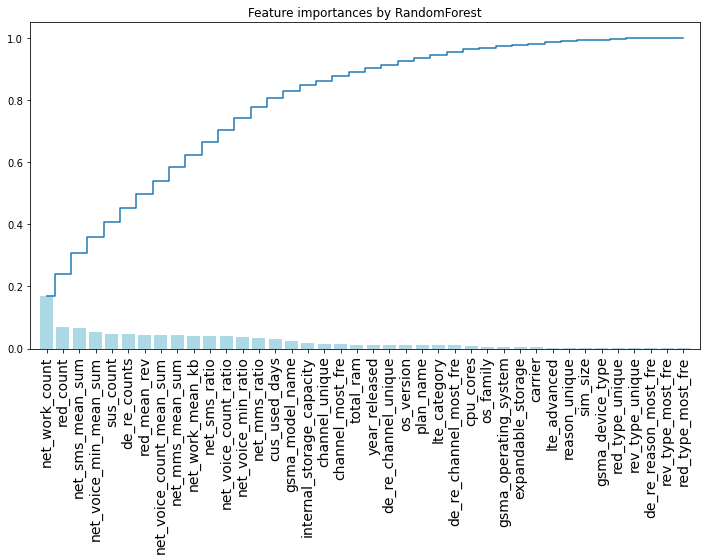

In [13]:
RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=400).fit(data_X,data_y)
import matplotlib.pyplot as plt
importances = RFC.feature_importances_
feat_names = data_X.columns
# 排序
indices = np.argsort(importances)[::-1]
# 绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

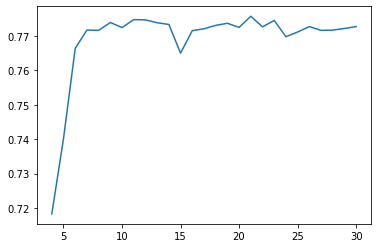

In [14]:
scoring = ['f1']
f1_dict = {}
for i in range(4,31):
    use_features = feat_names[indices][:i]
    RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=40)
    scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 5,scoring = scoring)
    #y_pred = RFC.predict(data_X[use_features])
    #f1 = f1_score(data_y,y_pred)
    f1_dict[i] = scores["test_f1"].mean()
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

In [17]:
feat_names[indices][:21]

Index(['net_work_count', 'red_count', 'net_sms_mean_sum',
       'net_voice_min_mean_sum', 'sus_count', 'de_re_counts', 'red_mean_rev',
       'net_voice_count_mean_sum', 'net_mms_mean_sum', 'net_work_mean_kb',
       'net_sms_ratio', 'net_voice_count_ratio', 'net_voice_min_ratio',
       'net_mms_ratio', 'cus_used_days', 'gsma_model_name',
       'internal_storage_capacity', 'channel_unique', 'channel_most_fre',
       'total_ram', 'year_released'],
      dtype='object')

In [19]:
#top21 exclude cus_used_days
scoring = ['f1']
use_features = ['net_work_count', 'red_count', 'net_sms_mean_sum',
       'net_voice_min_mean_sum', 'sus_count', 'de_re_counts', 'red_mean_rev',
       'net_voice_count_mean_sum', 'net_mms_mean_sum', 'net_work_mean_kb',
       'net_sms_ratio', 'net_voice_count_ratio', 'net_voice_min_ratio',
       'net_mms_ratio', 'gsma_model_name',
       'internal_storage_capacity', 'channel_unique', 'channel_most_fre',
       'total_ram', 'year_released']
RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=40)
scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 5,scoring = scoring)
scores["test_f1"].mean()

0.7837812262076683

In [23]:
data_val

,line_id,red_count,red_mean_rev,channel_unique,red_type_unique,rev_type_unique,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,...,net_sms_ratio,net_voice_min_ratio,net_voice_count_ratio,net_work_count,de_re_counts,reason_unique,de_re_channel_unique,de_re_channel_most_fre,de_re_reason_most_fre,date_observed
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,1.857143,0.107049,2.0,1.0,1.0,1.0,0.0,0.0,2.0,...,0.489040,0.306524,0.607356,0.452174,1.0,1,1,3.0,0.0,2021-03-10
1,e879756a-daff-4f72-9206-d96009861ac1,2.214286,-0.024299,1.0,1.0,1.0,4.0,0.0,0.0,1.0,...,0.108699,-0.501000,-0.364774,0.452174,0.0,1,1,1.0,0.0,2021-03-10
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,-0.214286,0.194615,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,-0.266749,-0.371777,-0.102270,0.121739,16.0,1,2,1.0,0.0,2021-03-10
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,3.000000,-2.459720,1.0,2.0,2.0,3.0,0.0,0.0,4.0,...,3.783508,-0.192951,-0.075461,0.356522,0.0,1,1,1.0,0.0,2021-03-13
4,1987025d-39be-4120-a09a-8d89c0e8d151,-0.214286,-0.097271,3.0,1.0,1.0,1.0,0.0,0.0,2.0,...,0.463301,-0.271230,-0.578919,-0.347826,9.0,1,3,1.0,0.0,2021-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37150,bca0aa56-6582-4d01-b67a-3cf8a10c7632,-0.357143,0.194615,1.0,1.0,1.0,3.0,0.0,0.0,4.0,...,-0.232099,0.251698,-0.123927,-0.930435,0.0,1,1,1.0,0.0,2021-03-13
37151,e857da2f-aaac-47d6-80f5-d475e87be7b2,-0.357143,-0.681042,1.0,1.0,1.0,1.0,0.0,0.0,4.0,...,-0.016822,1.070986,0.548764,-0.982609,0.0,1,1,1.0,0.0,2021-03-13
37152,ab633967-4f11-435b-a755-13015d242364,-0.285714,-0.977890,2.0,1.0,1.0,2.0,0.0,0.0,2.0,...,-0.027310,-0.420385,-0.489817,-0.782609,0.0,1,1,1.0,0.0,2021-03-11
37153,ab9dda24-b688-4cb8-9ff8-27158438ff4d,0.642857,0.475292,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.104921,-0.399247,-0.291850,0.443478,36.0,1,1,0.0,0.0,2021-03-14


In [22]:
#top21 exclude cus_used_days
use_features = ['net_work_count', 'red_count', 'net_sms_mean_sum',
       'net_voice_min_mean_sum', 'sus_count', 'de_re_counts', 'red_mean_rev',
       'net_voice_count_mean_sum', 'net_mms_mean_sum', 'net_work_mean_kb',
       'net_sms_ratio', 'net_voice_count_ratio', 'net_voice_min_ratio',
       'net_mms_ratio', 'gsma_model_name',
       'internal_storage_capacity', 'channel_unique', 'channel_most_fre',
       'total_ram', 'year_released']
RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=40).fit(data_X[use_features],data_y)
pred = RFC.predict(data_val_X[use_features])
pred

array([1, 1, 0, ..., 0, 0, 0])

In [26]:
submission = pd.DataFrame(data_val['line_id'])
submission['upgrade'] = pred
submission['upgrade'].value_counts()

0    28576
1     8579
Name: upgrade, dtype: int64

In [27]:
teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'
submission_path=root_folder+"submission/2021-04-18.csv"
submission.to_csv(submission_path,header=True,index=None)

In [83]:
sub_18 = pd.read_csv(root_folder+"submission/2021-04-18.csv")
sub_18['upgrade'].value_counts()

0    28576
1     8579
Name: upgrade, dtype: int64

In [15]:
f1_dict

{4: 0.7182485384863485,
 5: 0.7401379159271071,
 6: 0.7663772449548112,
 7: 0.7717179122103311,
 8: 0.7716345489792884,
 9: 0.7739331524752259,
 10: 0.7724430621756172,
 11: 0.7747599386202756,
 12: 0.7746821207765953,
 13: 0.7738532584962353,
 14: 0.7733553282736112,
 15: 0.7650222398700786,
 16: 0.7715429394360751,
 17: 0.7720966446192984,
 18: 0.773081356951752,
 19: 0.7736957700523119,
 20: 0.7725041256264594,
 21: 0.7757416169728192,
 22: 0.7726458933432053,
 23: 0.7745377425725171,
 24: 0.7697865891732067,
 25: 0.771157638709924,
 26: 0.7727421105733692,
 27: 0.7716291595459687,
 28: 0.7717095613583929,
 29: 0.7721765857811365,
 30: 0.7727356122459019}

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

## make submission

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
param_grid = {#'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500],
 'criterion' :['entropy']}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X[use_features],data_y)
CV_rfc.best_params_

In [ ]:
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'
submission_path=root_folder+"submission/2021-04-10.csv"

In [173]:
CV_rfc.best_score_

0.7654218674509696

In [172]:
CV_rfc.best_score_

0.7654218674509696

In [167]:
#Adaboost

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,2,10, 50],#1,2
              'learning_rate' : [ 0.0001,0.01, 0.1, 1.0]
             }

CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 10}

In [171]:
CV_abc.best_score_

0.6840062835872963

In [46]:
data_train = pd.read_csv(root_folder+"guohuan-li/new_data/dev_final_merge.csv")
data_val = pd.read_csv(root_folder+"guohuan-li/new_data/eval_final_merge.csv")

#drop some features not in both datasets
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(train_lst,val_lst)
data_train.drop(drop_lst, axis=1,inplace=True)
train_lst = list(data_train.columns[3:])
val_lst = list(data_val.columns[1:])
drop_lst = np.setdiff1d(val_lst,train_lst)
data_val.drop(drop_lst, axis=1,inplace=True)

In [4]:
#extract the training data
data_y = data_train['upgrade'].replace({'no':0,'yes':1})
data_X = data_train.drop(['line_id','upgrade_date','upgrade'],axis = 1)
data_val_X = data_val.drop(['line_id'],axis = 1)

In [20]:
data_y

0        0
1        1
2        0
3        1
4        1
        ..
19354    0
19355    1
19356    1
19357    0
19358    1
Name: upgrade, Length: 19359, dtype: int64

In [6]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   red_count                            19359 non-null  float64
 1   red_mean_rev                         19359 non-null  float64
 2   channel_unique                       19359 non-null  float64
 3   red_type_unique                      19359 non-null  float64
 4   red_type_most_fre_MPPAID             19359 non-null  float64
 5   red_type_most_fre_PAID               19359 non-null  float64
 6   red_type_most_fre_Replacement        19359 non-null  float64
 7   channel_most_fre_APP                 19359 non-null  float64
 8   channel_most_fre_HANDSET             19359 non-null  float64
 9   channel_most_fre_IVR                 19359 non-null  float64
 10  channel_most_fre_RTR                 19359 non-null  float64
 11  channel_most_fre_SMS        

In [ ]:
def select_data(data_frame):
    '''Selects certain features from raw GCR records.'''
    df_selection = data_frame.loc[:,['line_id',"carrier","plan_name",'total_kb',"upgrade"]]
    return df_selection

def get_usage_summary(df):
    '''Returns aggregate data usage for a line_id.'''
    data_kb= df.loc[:,['line_id', "total_kb"]]
    data_kb = data_kb.groupby('line_id')['total_kb'].sum().reset_index()
    data_kb.columns=['line_id','sum_total_kb']
    return data_kb

def preprocess_customer_info(df):
    '''Imputes null values in carrier and plan_name column with most frequent value.'''
    customer_info=df.loc[:,['line_id','carrier','plan_name']].drop_duplicates()
    customer_info['carrier'].fillna(customer_info['carrier'].mode()[0], inplace=True)
    customer_info['plan_name'].fillna(customer_info['plan_name'].mode()[0], inplace=True)
    customer_info=pd.get_dummies(customer_info,columns=['carrier','plan_name'],drop_first=True)
    return customer_info

def train_model(train_X,train_Y):
    '''Given a preprocessed training dataset, trains a simple logistic regression model and 
    returns the trained model object'''
    lr_recipe = LogisticRegression(fit_intercept=True,class_weight='balanced')
    lr_model = lr_recipe.fit(train_X,train_Y)
    return lr_model

def evaluate_model(model, test_X,test_Y):
    '''Given a model and preprocessed test dataset, returns the f1 value'''
    y_pred=model.predict(test_X)
    f1 =f1_score(test_Y, y_pred)
    return round(f1,3)

def main(data_path, random_seed, test_ratio=0.2):
    '''The end to end model pipeline'''
    df =pd.read_csv(data_path,low_memory=True)    
    df_selected = select_data(df)
    usage_summary=get_usage_summary(df_selected)
    customer_info=preprocess_customer_info(df_selected)
    line_ids=df_selected.loc[:,['line_id','upgrade']].drop_duplicates().reset_index(drop=True)
    df_preprocessed=pd.merge(line_ids,usage_summary,on='line_id',how='inner')
    df_preprocessed=pd.merge(df_preprocessed,customer_info,on='line_id')
    df_Y=df_preprocessed['upgrade'].replace({'yes':1,'no':0})
    df_X=df_preprocessed.drop(columns=['line_id','upgrade'])
    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=test_ratio, random_state=random_seed)
    num_train = len(X_train)
    num_test = len(X_test)
    print(f"Train has {num_train}")
    print(f"Test has {num_test}")
    model = train_model(X_train,Y_train)
    f1 = evaluate_model(model, X_test,Y_test)
    return model,f1

def make_predictions(model,eval_data_path,submission_path):
    '''Given a model, eval data path and submission path, makes predictions and 
    saves the submissions to submission path.'''
    eval_data = pd.read_csv(data_path,low_memory=True)    
    df_selected = select_data(eval_data)
    usage_summary=get_usage_summary(df_selected)
    customer_info=preprocess_customer_info(df_selected)
    line_ids=df_selected.loc[:,['line_id']].drop_duplicates().reset_index(drop=True)
    df_preprocessed=pd.merge(line_ids,usage_summary,on='line_id',how='inner')
    df_preprocessed=pd.merge(df_preprocessed,customer_info,on='line_id')
    eval_X=df_preprocessed.drop(columns=['line_id'])
    predictions=pd.DataFrame(line_ids,columns=['line_id'])
    predictions['prediction']=model.predict(eval_X)
    predictions.to_csv(submission_path,header=True,index=None)
    print(f"submission saved to {submission_path}")

In [63]:
X_train

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.146179,0.011694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040279,0.014616,0.003699,0.000865
1,0.122924,0.055288,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.007654,0.001790,0.003529,0.003105,0.004315,0.020009,0.018758,0.002877,0.005149
2,0.013289,0.049344,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.010001,0.012862,0.001296,0.001285,0.004141,0.078985,0.054777,0.016367,0.011887
3,0.089701,0.066824,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.001775,0.001468,0.000557,0.000567,0.004532,0.013643,0.015461,0.008836,0.004643
4,0.029900,0.067227,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.006400,0.003024,0.001463,0.001035,0.013455,0.042141,0.032500,0.009139,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.069767,0.066286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.060515,0.035946,0.000318,0.000175,0.004381,0.059783,0.050261,0.026819,0.024530
19355,0.093023,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.000792,0.000741,0.000343,0.000326,0.053482,0.082766,0.075532,0.026687,0.031058
19356,0.086379,0.066425,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.004553,0.000679,0.001501,0.001622,0.022613,0.159621,0.101462,0.059980,0.030480
19357,0.023256,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.01484,0.008473,0.003183,0.002048,0.001948,0.009416,0.030045,0.020845,0.009152,0.007267


In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=model.predict(X_test)
f1 =f1_score(test_Y, y_pred)

In [72]:
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,train_size=0.8)
DTC = DecisionTreeClassifier().fit(X_train,y_train)
RFC = RandomForestClassifier().fit(X_train,y_train)
ABC = AdaBoostClassifier().fit(X_train,y_train)
LR = LogisticRegression(max_iter=500).fit(X_train,y_train)
MLP = MLPClassifier(max_iter = 500).fit(X_train,y_train)
SVM = SVC().fit(X_train,y_train)

In [37]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVM = SVC()

In [119]:
clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']

In [92]:
from sklearn.model_selection import cross_validate

'criterion': 'gini',
'max_depth': 8,
'max_features': 'auto',
'n_estimators': 200

In [122]:
from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']
scores  = cross_validate(RandomForestClassifier(n_estimators=200),data_X,data_y,cv = 10,scoring = scoring,return_train_score=True)
print(f'The model {names[1]} f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')

The model RFC f1 is 0.7640254629812068, accu is 0.8694146539389669


In [121]:
RFC = RandomForestClassifier()
RFC.fit(data_X,data_y)

RandomForestClassifier()

In [125]:
data_val_X

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.343750,0.072165,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.000872,0.000237,0.012822,0.011754,0.001293,0.017045,0.035513,0.045832,0.018568
1,0.046875,0.163476,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.002608,0.000168,0.003904,0.003428,0.001087,0.000508,0.014588,0.000197,0.004587
2,0.164062,0.075211,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.004670,0.004449,0.139339,0.130237,0.007121,0.060105,0.082680,0.018683,0.006547
3,0.125000,0.057611,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.001165,0.000120,0.015224,0.008857,0.003790,0.012247,0.064468,0.012884,0.017049
4,0.265625,0.090074,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.005199,0.027256,0.017265,0.002377,0.064312,0.014482,0.041124,0.009324,0.009494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,0.070312,0.063918,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003007,0.003678,0.029917,0.035271,0.027462,0.022154,0.078836,0.012268,0.014641
12740,0.265625,0.052725,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.012750,0.003659,0.057319,0.076913,0.005780,0.013219,0.032109,0.008480,0.007520
12741,0.343750,0.070607,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000955,0.000303,0.010649,0.008325,0.016477,0.001376,0.003090,0.001978,0.000788
12742,0.023438,0.082907,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.003373,0.000890,0.122693,0.069080,0.221589,0.034388,0.068129,0.008050,0.006131


In [127]:
pred = RFC.predict(data_val_X)
len(pred)

12744

In [156]:
pred = CV_rfc.predict(data_val_X)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [159]:
count = 0
for i in pred:
    if i == 1:
        count += 1
count

2732

In [146]:
count / len(pred)

0.21429692404268674

In [157]:
data_val['upgrade'] = pred

In [175]:
teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

In [55]:
root_folder

's3://tf-trachack-notebooks/emotional-support-vector-machine-unsw/jupyter/jovyan/'

In [158]:
teamname = 'emotional-support-vector-machine-unsw'
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'
submission_path=root_folder+"submission/2021-04-10.csv"
data_val[['line_id','upgrade']].to_csv(submission_path,header=True,index=None)

In [ ]:
predictions=pd.DataFrame(line_ids,columns=['line_id'])
predictions['prediction'] = model.predict(eval_X)
predictions.to_csv(submission_path,header=True,index=None)

In [ ]:
data_X

from sklearn.model_selection import cross_validate
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=100)
ABC = AdaBoostClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVM = SVC()
clfs = [DTC,RFC,ABC,LR,MLP,SVM]
names = ['DTC','RFC','ABC','LR','MLP','SVM']
scoring = ['f1','precision','recall','accuracy']
for i in range(len(names)):
    scores  = cross_validate(clfs[i],data_X[use_features],data_y,cv = 10,scoring = scoring,return_train_score=True)
    print(f'The model {names[i]} f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')
    print()

In [36]:
data_X[use_features]

,network_used_day,red_count,mean_total_kb,mean_sms_in,mean_sms_out,mean_voice_min_out,mean_voice_min_in,red_mean_rev,mean_voice_count_total,cus_used_days,mean_mms_in,mean_voice_count_in,mean_mms_out,sus_count,dea_times,mean_hotspot_kb,channel_unique,plan_name_plan 2,channel_most_fre_IVR,channel_most_fre_WEB
0,0.346369,0.146179,0.000000,0.000000,0.000000,0.000865,0.003699,0.011694,0.014616,0.370125,0.000000,0.040279,0.000000,0.000000,0.000000,0.00000,0.0,0,0.0,1.0
1,1.000000,0.122924,0.004315,0.003529,0.003105,0.005149,0.002877,0.055288,0.018758,0.116507,0.007654,0.020009,0.001790,0.359649,0.695652,0.00000,0.4,1,1.0,0.0
2,0.737430,0.013289,0.004141,0.001296,0.001285,0.011887,0.016367,0.049344,0.054777,0.059848,0.010001,0.078985,0.012862,0.096491,0.043478,0.00000,0.4,1,0.0,1.0
3,0.966480,0.089701,0.004532,0.000557,0.000567,0.004643,0.008836,0.066824,0.015461,0.000000,0.001775,0.013643,0.001468,0.000000,0.000000,0.00000,0.2,0,0.0,1.0
4,1.000000,0.029900,0.013455,0.001463,0.001035,0.007379,0.009139,0.067227,0.032500,0.202845,0.006400,0.042141,0.003024,0.061404,0.065217,0.00000,0.4,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.988827,0.069767,0.004381,0.000318,0.000175,0.024530,0.026819,0.066286,0.050261,0.097376,0.060515,0.059783,0.035946,0.061404,-1.000000,0.00000,0.0,0,0.0,0.0
19355,1.000000,0.093023,0.053482,0.000343,0.000326,0.031058,0.026687,0.068169,0.075532,0.025509,0.000792,0.082766,0.000741,0.131579,0.282609,0.00000,0.2,0,1.0,0.0
19356,1.000000,0.086379,0.022613,0.001501,0.001622,0.030480,0.059980,0.066425,0.101462,0.069904,0.004553,0.159621,0.000679,0.333333,0.086957,0.00000,0.0,0,1.0,0.0
19357,0.988827,0.023256,0.009416,0.002048,0.001948,0.007267,0.009152,0.068169,0.020845,0.047093,0.008473,0.030045,0.003183,0.017544,0.043478,0.01484,0.2,0,0.0,0.0


In [40]:
from sklearn.model_selection import cross_validate
scoring = ['f1','precision','recall','accuracy']
RFC = RandomForestClassifier()
scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 10,scoring = scoring,return_train_score=True)
print(f'The model RFC f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')
print()

The model RFC f1 is 0.7683098564454808, accu is 0.8697244378243321



In [95]:
pd.set_option("display.max_rows",60)

In [96]:
submission.set_index('line_id')

,upgrade
line_id,
a345b1ec-d999-47ed-8715-99d73797c8eb,1
2c8d27db-3ec7-4036-a70b-58098467071e,0
992479f5-2a43-481b-9f26-a3b489d336c8,1
20afe47b-2549-4019-8dfb-0c50d2514aae,0
bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,1
...,...
edd1a80c-2c96-4922-8e32-f7361ee23828,0
0c9ec1ed-ee9e-4995-9fea-64e992c56a2b,0
1666d58c-732d-475a-91b9-11880f9cedbe,0


In [ ]:
submission

#criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=100
The model RFC f1 is 0.7694861081461757, accu is 0.8701895274094007

In [66]:
RFC = RandomForestClassifier(criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=100).fit(data_X[use_features],data_y)

In [65]:
data_val_X[use_features]

,network_used_day,red_count,mean_total_kb,mean_sms_in,mean_sms_out,mean_voice_min_out,mean_voice_min_in,red_mean_rev,mean_voice_count_total,cus_used_days,mean_mms_in,mean_voice_count_in,mean_mms_out,sus_count,dea_times,mean_hotspot_kb,channel_unique,plan_name_plan 2,channel_most_fre_IVR,channel_most_fre_WEB
0,1.000000,0.343750,0.001293,0.012822,0.011754,0.018568,0.045832,0.072165,0.035513,0.104558,0.000872,0.017045,0.000237,0.216216,0.347826,0.0,0.000000,0,1.0,0.0
1,0.882682,0.046875,0.001087,0.003904,0.003428,0.004587,0.000197,0.163476,0.014588,0.000000,0.002608,0.000508,0.000168,0.099099,0.065217,0.0,0.333333,1,1.0,0.0
2,1.000000,0.164062,0.007121,0.139339,0.130237,0.006547,0.018683,0.075211,0.082680,0.161833,0.004670,0.060105,0.004449,0.315315,0.434783,0.0,0.166667,0,1.0,0.0
3,0.988827,0.125000,0.003790,0.015224,0.008857,0.017049,0.012884,0.057611,0.064468,0.177919,0.001165,0.012247,0.000120,-1.000000,-1.000000,0.0,0.166667,1,1.0,0.0
4,1.000000,0.265625,0.064312,0.017265,0.002377,0.009494,0.009324,0.090074,0.041124,0.290032,0.005199,0.014482,0.027256,0.045045,0.021739,0.0,0.166667,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,0.910615,0.070312,0.027462,0.029917,0.035271,0.014641,0.012268,0.063918,0.078836,0.161589,0.003007,0.022154,0.003678,0.135135,0.173913,0.0,0.166667,1,0.0,1.0
12740,0.988827,0.265625,0.005780,0.057319,0.076913,0.007520,0.008480,0.052725,0.032109,0.150865,0.012750,0.013219,0.003659,0.045045,0.021739,0.0,0.333333,1,0.0,1.0
12741,0.977654,0.343750,0.016477,0.010649,0.008325,0.000788,0.001978,0.070607,0.003090,0.009018,0.000955,0.001376,0.000303,0.036036,0.086957,0.0,0.166667,0,0.0,1.0
12742,0.597765,0.023438,0.221589,0.122693,0.069080,0.006131,0.008050,0.082907,0.068129,0.053132,0.003373,0.034388,0.000890,0.009009,0.021739,0.0,0.166667,0,1.0,0.0


In [67]:
pred = RFC.predict(data_val_X[use_features])

In [68]:
submission = pd.DataFrame(data_val['line_id'])

In [70]:
submission['upgrade'] = pred

In [71]:
submission

,line_id,upgrade
0,a345b1ec-d999-47ed-8715-99d73797c8eb,1
1,2c8d27db-3ec7-4036-a70b-58098467071e,0
2,992479f5-2a43-481b-9f26-a3b489d336c8,1
3,20afe47b-2549-4019-8dfb-0c50d2514aae,0
4,bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,1
...,...,...
12739,edd1a80c-2c96-4922-8e32-f7361ee23828,0
12740,0c9ec1ed-ee9e-4995-9fea-64e992c56a2b,0
12741,1666d58c-732d-475a-91b9-11880f9cedbe,0
12742,b9ab9462-20ef-46d6-b921-69fa90033750,0


In [72]:
root_folder

's3://tf-trachack-notebooks/emotional-support-vector-machine-unsw/jupyter/jovyan/'

In [97]:
sub1 = pd.read_csv(root_folder+"submission/2021-04-10.csv")

In [99]:
count = 0
for i in sub1['upgrade']:
    if i == 1:
        count+=1
count

2732

In [100]:
sub2 = pd.read_csv(root_folder+"submission/2021-04-11.csv")
count = 0
for i in sub2['upgrade']:
    if i == 1:
        count+=1
count

2775

In [85]:
submission_path=root_folder+"submission/2021-04-11.csv"
submission.to_csv(submission_path,header=True,index=None)

PermissionError: Anonymous access is forbidden for this operation

In [54]:
count = 0
for i in submission['upgrade']:
    if i == 1:
        count += 1
count

2766

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
param_grid = {#'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500],
 'criterion' :['entropy']}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X[use_features],data_y)
CV_rfc.best_params_

In [110]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=5)

In [102]:
pred = CV_rfc.predict(data_val_X[use_features])
pred

array([1, 0, 1, ..., 0, 0, 0])

In [111]:
count = 0
for i in pred:
    if i == 1:
        count +=1
count

2775

In [92]:
submission['upgrade'] = pred

In [81]:
submission

,line_id,upgrade
0,a345b1ec-d999-47ed-8715-99d73797c8eb,1
1,2c8d27db-3ec7-4036-a70b-58098467071e,0
2,992479f5-2a43-481b-9f26-a3b489d336c8,1
3,20afe47b-2549-4019-8dfb-0c50d2514aae,0
4,bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,1
...,...,...
12739,edd1a80c-2c96-4922-8e32-f7361ee23828,0
12740,0c9ec1ed-ee9e-4995-9fea-64e992c56a2b,0
12741,1666d58c-732d-475a-91b9-11880f9cedbe,0
12742,b9ab9462-20ef-46d6-b921-69fa90033750,0


In [ ]:
{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

best1:'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 100
 
best2: {'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [152]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [14]:
data_X

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,0.146179,0.011694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040279,0.014616,0.003699,0.000865
1,0.122924,0.055288,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.007654,0.001790,0.003529,0.003105,0.004315,0.020009,0.018758,0.002877,0.005149
2,0.013289,0.049344,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.010001,0.012862,0.001296,0.001285,0.004141,0.078985,0.054777,0.016367,0.011887
3,0.089701,0.066824,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.001775,0.001468,0.000557,0.000567,0.004532,0.013643,0.015461,0.008836,0.004643
4,0.029900,0.067227,0.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.006400,0.003024,0.001463,0.001035,0.013455,0.042141,0.032500,0.009139,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19354,0.069767,0.066286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.060515,0.035946,0.000318,0.000175,0.004381,0.059783,0.050261,0.026819,0.024530
19355,0.093023,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.000792,0.000741,0.000343,0.000326,0.053482,0.082766,0.075532,0.026687,0.031058
19356,0.086379,0.066425,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.00000,0.004553,0.000679,0.001501,0.001622,0.022613,0.159621,0.101462,0.059980,0.030480
19357,0.023256,0.068169,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.01484,0.008473,0.003183,0.002048,0.001948,0.009416,0.030045,0.020845,0.009152,0.007267


In [21]:
data_train['upgrade'] = data_y

In [23]:
data_train = data_train.drop(['line_id','upgrade_date'],axis=1)

In [25]:
data_train.describe()

,upgrade,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
count,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,...,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000
mean,0.338551,0.063223,0.071565,0.207516,0.022670,0.995764,0.000568,0.001550,0.132755,0.004339,...,0.005591,0.016104,0.013430,0.002495,0.002160,0.025205,0.060767,0.054458,0.025998,0.026583
std,0.473229,0.049933,0.070442,0.192379,0.088697,0.064946,0.023831,0.039336,0.339318,0.065730,...,0.028260,0.043138,0.042816,0.008113,0.008160,0.039249,0.069335,0.061167,0.041560,0.038422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.019934,0.051854,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001137,0.000377,0.000471,0.000223,0.003272,0.018035,0.017091,0.004875,0.005755
50%,0.000000,0.053156,0.066286,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004641,0.002530,0.001290,0.000900,0.011703,0.040777,0.037014,0.013561,0.015174
75%,1.000000,0.100689,0.072352,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014614,0.010233,0.002857,0.002382,0.030661,0.078191,0.068976,0.030615,0.032346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100

In [15]:
RFC = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto',n_estimators=100).fit(data_X,data_y)

In [26]:
data_X.columns

Index(['red_count', 'red_mean_rev', 'channel_unique', 'red_type_unique',
       'red_type_most_fre_MPPAID', 'red_type_most_fre_PAID',
       'red_type_most_fre_Replacement', 'channel_most_fre_APP',
       'channel_most_fre_HANDSET', 'channel_most_fre_IVR',
       'channel_most_fre_RTR', 'channel_most_fre_SMS', 'channel_most_fre_TAS',
       'channel_most_fre_WARP', 'channel_most_fre_WEB',
       'channel_most_fre_WEBCSR', 'available_online_Y',
       'available_online_is_miss', 'device_type_Others',
       'device_type_SMARTPHONE', 'device_type_is_miss',
       'device_lock_state_UNLOCKABLE', 'device_lock_state_is_miss',
       'data_capable_1.0', 'bluetooth_Y', 'bluetooth_is_miss',
       'battery_removable_Y', 'battery_removable_is_miss', 'fm_radio_Y',
       'fm_radio_is_miss', 'display_description_IPHONE 6S',
       'display_description_LG L722DL', 'display_description_Others',
       'display_description_Samsung S506DL', 'display_description_is_miss',
       'cus_used_days', 'carr

#

In [ ]:
#RFC
from sklearn.model_selection import GridSearchCV
#param_grid = {#'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200]
#'criterion' :['gini', 'entropy']}
#'bootstrap': [True], 
#'max_depth': [5, 10, None]
#'max_features': ['auto','log2','sqrt']
#}
#n_estimators: Number of tree your random forest should have. The more n_estimators the less overfitting. You should try from 100 to 5000 range.
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto','log2','sqrt'],
    'max_depth' : [10, 20,None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

In [142]:
#Adaboost

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,10, 50,100,400],#1,2
              'learning_rate' : [ 0.001,0.01, 0.1, 1.0]
             }

CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.001,
 'n_estimators': 400}

In [51]:
use_features

['net_work_count',
 'red_count',
 'net_work_mean_kb',
 'red_mean_rev',
 'sus_count',
 'c',
 'h',
 'a',
 'n',
 'n',
 'e',
 'l',
 '_',
 'm',
 'o',
 's',
 't',
 '_',
 'f',
 'r',
 'e',
 'internal_storage_capacity',
 'total_ram']

adboost label encoder
{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'learning_rate': 0.001,
 'n_estimators': 400}
 0.7455254

In [ ]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
LR = LogisticRegression()
MLP = MLPClassifier()
SVM = SVC()

In [143]:
CV_abc.best_score_

0.7455254757783065

In [100]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [101]:
CV_rfc.best_score_

0.72949324126133

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 400],
    'max_features': ['auto','log2','sqrt'],
    'max_depth' : [10, 20, 30,None],
    'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 400}

In [121]:
CV_rfc.best_score_

0.7320980646779599

In [ ]:
'''
#RFC
from sklearn.model_selection import GridSearchCV
param_grid = {#'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,500],
 'criterion' :['entropy']}
RFC = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_rfc.fit(data_X,data_y)
CV_rfc.best_params_

In [27]:
CV_rfc.best_score_

0.9951826039948465

In [41]:
feat_names[indices][:1]

Index(['operating_system'], dtype='object')

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
scoring = ['f1','precision','recall','accuracy']
RFC = RandomForestClassifier()
scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 10,scoring = scoring,return_train_score=True)
print(f'The model RFC f1 is {scores["test_f1"].mean()}, accu is {scores["test_accuracy"].mean()}')

In [105]:
feat_names

Index(['red_count', 'red_mean_rev', 'channel_most_fre', 'red_type_most_fre',
       'rev_type_most_fre', 'cpu_cores', 'expandable_storage',
       'gsma_device_type', 'gsma_model_name', 'gsma_operating_system',
       'internal_storage_capacity', 'lte_advanced', 'lte_category',
       'os_family', 'os_version', 'sim_size', 'total_ram', 'year_released',
       'cus_used_days', 'plan_name', 'carrier', 'sus_count',
       'net_work_mean_kb', 'net_work_count'],
      dtype='object')

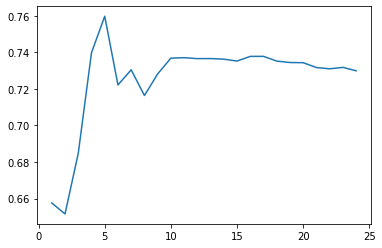

In [106]:
scoring = ['f1']
f1_dict = {}
for i in range(1,len(feat_names)+1):
    use_features = feat_names[indices][:i]
    RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',n_estimators=200,min_samples_leaf=1,min_samples_split=2)
    scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 10,scoring = scoring)
    #y_pred = RFC.predict(data_X[use_features])
    #f1 = f1_score(data_y,y_pred)
    f1_dict[i] = scores["test_f1"].mean()
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

In [49]:
use_features = feat_names[indices][:5].values + feat_names[indices][6] + feat_names[indices][9:11].values
use_features

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [46]:
feat_names[indices][:5].values

array(['net_work_count', 'red_count', 'net_work_mean_kb', 'red_mean_rev',
       'sus_count'], dtype=object)

In [107]:
f1_dict

{1: 0.6575505936440995,
 2: 0.6516028604970397,
 3: 0.68475241983102,
 4: 0.7398044259321652,
 5: 0.7597536277898882,
 6: 0.7221671899393759,
 7: 0.7304321855068505,
 8: 0.7163853105417894,
 9: 0.7281980777225188,
 10: 0.7368340563066043,
 11: 0.7370788553423446,
 12: 0.7365686729333987,
 13: 0.7366027332933429,
 14: 0.7362699982262606,
 15: 0.7352334461561953,
 16: 0.737794111101309,
 17: 0.7378074329193653,
 18: 0.735219480431878,
 19: 0.7344360979801814,
 20: 0.734341215518479,
 21: 0.7316792310727354,
 22: 0.7309913347092672,
 23: 0.7317852399281275,
 24: 0.7299041981642219}

In [38]:
use_features = feat_names[indices]
use_features

Index(['net_work_count', 'red_count', 'net_work_mean_kb', 'red_mean_rev',
       'sus_count', 'cus_used_days', 'channel_most_fre', 'plan_name',
       'gsma_model_name', 'internal_storage_capacity', 'total_ram',
       'lte_category', 'os_version', 'year_released', 'cpu_cores', 'carrier',
       'os_family', 'gsma_operating_system', 'expandable_storage',
       'lte_advanced', 'sim_size', 'gsma_device_type', 'rev_type_most_fre',
       'red_type_most_fre'],
      dtype='object')

In [134]:
data_train['upgrade'].value_counts()

no     40694
yes    15174
Name: upgrade, dtype: int64

In [137]:
data_train['upgrade'] = data_train['upgrade'].replace({'yes':1,'no':0})

In [141]:
q = 40694 / len(data_train)
2 * q / (q+1)

0.8428574387440193

In [138]:
temp = [0] * len(data_train)

In [139]:
f1_score(data_train['upgrade'],temp)

0.0

In [ ]:
data_X

# test

'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 400

In [122]:
RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=400).fit(data_X,data_y)

In [147]:
RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',n_estimators=200,min_samples_leaf=1,min_samples_split=2).fit(data_X[use_features],data_y)

In [ ]:
SVM()

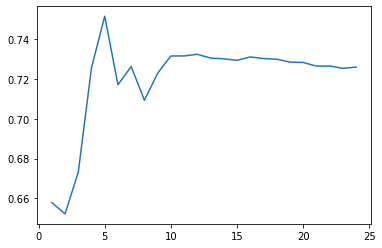

In [34]:
scoring = ['f1']
f1_dict = {}
for i in range(1,len(feat_names)+1):
    use_features = feat_names[indices][:i]
    RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=400)
    scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 5,scoring = scoring)
    #y_pred = RFC.predict(data_X[use_features])
    #f1 = f1_score(data_y,y_pred)
    f1_dict[i] = scores["test_f1"].mean()
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

In [35]:
f1_dict

{1: 0.6578812471126345,
 2: 0.6521527133486956,
 3: 0.6730782902560408,
 4: 0.725598651661541,
 5: 0.7515467553031688,
 6: 0.7170993476888203,
 7: 0.7262658218688798,
 8: 0.7092941164517258,
 9: 0.7229183890580549,
 10: 0.7315619939200854,
 11: 0.7315868572007667,
 12: 0.7324165539162139,
 13: 0.7305218561363354,
 14: 0.7301291265741515,
 15: 0.7293773707226426,
 16: 0.7310831238056703,
 17: 0.7302985450557868,
 18: 0.7299415994157291,
 19: 0.7285004089193713,
 20: 0.7283094127916379,
 21: 0.7264601180549215,
 22: 0.7265336922366868,
 23: 0.7253333308615788,
 24: 0.725987705081484}

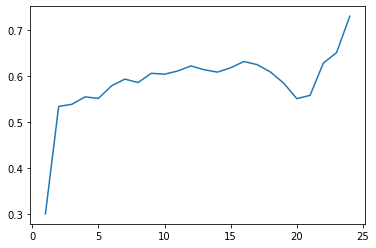

In [30]:
#label encode
f1_dict = {}
for i in range(1,(len(feat_names)+1)):
    use_features = feat_names[:i]
    X_train, X_val, y_train, y_val = train_test_split(data_X[use_features], data_y, test_size=0.2)
    RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=400).fit(X_train,y_train)
    y_pred = RFC.predict(X_val)
    f1_dict[i] = f1_score(y_val,y_pred)
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

In [31]:
f1_dict

{1: 0.29957275697411406,
 2: 0.5339992316557818,
 3: 0.5388523047977423,
 4: 0.5549242424242424,
 5: 0.5515542077331312,
 6: 0.5790051207022677,
 7: 0.5937557056782911,
 8: 0.5861943024105186,
 9: 0.6063867958378184,
 10: 0.6044349070100143,
 11: 0.6115146147032773,
 12: 0.6224453209035496,
 13: 0.6141048824593128,
 14: 0.6089928057553956,
 15: 0.6184593023255813,
 16: 0.6321076233183857,
 17: 0.6253110558123,
 18: 0.6093113825455834,
 19: 0.5850949480472949,
 20: 0.5509865388161534,
 21: 0.5583317678001128,
 22: 0.6285927584919746,
 23: 0.6514840395743887,
 24: 0.730891158858753}

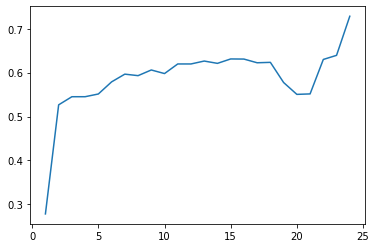

In [32]:
#label encode
f1_dict = {}
for i in range(1,(len(feat_names)+1)):
    use_features = feat_names[:i]
    X_train, X_val, y_train, y_val = train_test_split(data_X[use_features], data_y, test_size=0.2)
    RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',n_estimators=200,min_samples_leaf=1,min_samples_split=2).fit(X_train,y_train)
    y_pred = RFC.predict(X_val)
    f1_dict[i] = f1_score(y_val,y_pred)
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

In [33]:
f1_dict

{1: 0.2781974472518885,
 2: 0.5265571264807031,
 3: 0.5450390401828223,
 4: 0.5450773293096944,
 5: 0.5512699905926622,
 6: 0.5788510793999269,
 7: 0.5964471559303788,
 8: 0.593029490616622,
 9: 0.6059398768562114,
 10: 0.5977793696275071,
 11: 0.6196543899458893,
 12: 0.6196482501332385,
 13: 0.6262662164563711,
 14: 0.6210162083409215,
 15: 0.631052349472932,
 16: 0.6307911617961511,
 17: 0.6223651304037157,
 18: 0.6233062330623306,
 19: 0.5773906731990565,
 20: 0.5503963759909399,
 21: 0.5514511873350924,
 22: 0.6299153339604893,
 23: 0.6392588303416329,
 24: 0.7282972354287727}

In [17]:
#label encode
use_features = feat_names[:5]
RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',n_estimators=200,min_samples_leaf=1,min_samples_split=2).fit(data_X[use_features],data_y)
y_pred = RFC.predict(data_X[use_features])
f1_score(data_y,y_pred)

0.7802931413866409

In [6]:
#hash encode
#use_features = feat_names[:5]
RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=400).fit(hash_X,hash_y)
y_pred = RFC.predict(hash_X)
f1_score(hash_y,y_pred)

0.9962551737730767

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 400],
    'max_features': ['auto','log2','sqrt'],
    'max_depth' : [10, 20, 30,None],
    'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier()
CV_hash_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_hash_rfc.fit(hash_X,hash_y)
CV_hash_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 400}

hash:
{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 400}
 all variables useful

In [8]:
CV_hash_rfc.best_score_

0.7333470257442546

criterion = 'gini', max_depth = None, max_features='auto', n_estimators=400
RFC
top5
label encoder
0.765

In [ ]:
scoring = ['f1']
f1_dict = {}
for i in range(1,len(feat_names)+1):
    use_features = feat_names[indices][:i]
    RFC = RandomForestClassifier(criterion='gini',max_depth=30,max_features='auto',n_estimators=400)
    scores  = cross_validate(RFC,data_X[use_features],data_y,cv = 5,scoring = scoring)
    #y_pred = RFC.predict(data_X[use_features])
    #f1 = f1_score(data_y,y_pred)
    f1_dict[i] = scores["test_f1"].mean()
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

In [9]:
scoring = ['f1','precision','recall','accuracy']
f1_dict = {}
for i in range(1,len(feat_names)+1):
    use_features = feat_names[indices][:i]
    RFC = RandomForestClassifier(criterion='gini',max_depth=30,max_features='auto',n_estimators=400)
    scores  = cross_validate(RFC,hash_X,hash_y,cv = 5,scoring = scoring)
    #y_pred = RFC.predict(data_X[use_features])
    #f1 = f1_score(data_y,y_pred)
    f1_dict[i] = scores["test_f1"].mean()
import matplotlib.pyplot as plt
plt.plot(f1_dict.keys(),f1_dict.values())
plt.show()

NameError: name 'feat_names' is not defined

In [60]:
data_X

,red_count,red_mean_rev,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,...,os_version,sim_size,total_ram,year_released,cus_used_days,plan_name,carrier,sus_count,net_work_mean_kb,net_work_count
0,1.785714,0.147007,4.0,0.0,0.0,2.0,1.0,0.0,5.0,0.0,...,7.0,0.0,5.0,3.0,-3.416142,1.0,0.0,-0.181818,0.204743,0.460870
1,1.357143,0.745116,4.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,...,2.0,0.0,2.0,4.0,-0.058285,2.0,0.0,-0.181818,0.858832,0.460870
2,0.000000,-0.701531,4.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,2.0,-3.416142,1.0,0.0,0.090909,-0.036926,0.365217
3,-0.285714,-0.701531,3.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,2.0,-0.181331,1.0,0.0,-0.363636,0.078912,-0.721739
4,0.000000,1.045982,4.0,0.0,0.0,3.0,1.0,0.0,5.0,0.0,...,3.0,0.0,5.0,4.0,0.123046,1.0,0.0,1.000000,2.223418,0.460870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55863,-0.214286,0.000000,3.0,0.0,0.0,4.0,2.0,0.0,5.0,0.0,...,6.0,1.0,4.0,6.0,3.736709,1.0,0.0,-0.272727,-0.260398,0.330435
55864,1.285714,0.734955,0.0,0.0,0.0,2.0,0.0,0.0,5.0,1.0,...,0.0,0.0,2.0,2.0,-3.416142,1.0,0.0,0.090909,2.936256,0.460870
55865,-0.285714,0.218213,1.0,0.0,0.0,4.0,2.0,1.0,4.0,2.0,...,6.0,1.0,4.0,6.0,-3.416142,1.0,0.0,-0.363636,2.183958,-0.652174
55866,-0.285714,-1.167841,2.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,...,4.0,0.0,5.0,4.0,0.291424,2.0,0.0,-0.181818,-0.582868,-0.678261


In [13]:
feat_rank = ['net_work_count', 'red_count', 'net_work_mean_kb', 'red_mean_rev',
       'sus_count', 'cus_used_days', 'channel_most_fre', 'plan_name',
       'gsma_model_name', 'internal_storage_capacity', 'total_ram',
       'lte_category', 'year_released', 'os_version', 'cpu_cores', 'carrier',
       'os_family', 'gsma_operating_system', 'expandable_storage', 'sim_size',
       'lte_advanced', 'gsma_device_type', 'rev_type_most_fre',
       'red_type_most_fre']

In [23]:
use_features = feat_rank[:16]
RFC = RandomForestClassifier(criterion='gini',max_depth=30,max_features='auto',n_estimators=400).fit(data_X[use_features],data_y)

In [25]:
y_val_pred = RFC.predict(data_val_X[use_features])
y_val_pred

array([0, 1, 0, ..., 0, 0, 0])

In [26]:
submission = pd.DataFrame(data_val['line_id'])
submission['upgrade'] = y_val_pred

In [28]:
#top 16
submission['upgrade'].value_counts()

0    29626
1     7529
Name: upgrade, dtype: int64

In [21]:
sub_16 = pd.read_csv(root_folder+"submission/2021-04-16.csv")
sub_16['upgrade'].value_counts()

0    29234
1     7921
Name: upgrade, dtype: int64

In [22]:
#top5
sub_15 = pd.read_csv(root_folder+"submission/2021-04-15.csv")
sub_15['upgrade'].value_counts()

0    29801
1     7354
Name: upgrade, dtype: int64

In [20]:
#top 10 features
submission['upgrade'].value_counts()

0    29739
1     7416
Name: upgrade, dtype: int64

In [17]:
root_folder

's3://tf-trachack-notebooks/emotional-support-vector-machine-unsw/jupyter/jovyan/'

In [29]:
submission_path=root_folder+"submission/2021-04-17.csv"
submission.to_csv(submission_path,header=True,index=None)

In [119]:
data_val

,line_id,red_count,red_mean_rev,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,...,sim_size,total_ram,year_released,cus_used_days,plan_name,carrier,sus_count,net_work_mean_kb,net_work_count,date_observed
0,584f0d75-5897-4e56-b475-0b3adf1aeb07,1.857143,0.136466,1.0,0.0,0.0,2.0,0.0,0.0,3.0,...,0.0,1.0,2.0,0.022753,2.0,1.0,-0.1,0.559048,0.452174,2021-03-10
1,e879756a-daff-4f72-9206-d96009861ac1,2.214286,-0.000562,4.0,0.0,0.0,1.0,0.0,0.0,5.0,...,0.0,2.0,3.0,0.234029,3.0,0.0,-0.4,1.006414,0.452174,2021-03-10
2,cbb0795d-716a-44f1-bc82-f8f8cb5db002,-0.214286,0.227818,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,-0.081260,1.0,0.0,0.1,-0.204284,0.121739,2021-03-10
3,e1e914fd-1e04-4148-9251-ed6a4dd6d3e7,3.000000,-2.541290,3.0,0.0,0.0,4.0,2.0,1.0,4.0,...,1.0,4.0,6.0,0.708587,1.0,0.0,-0.3,-0.580096,0.356522,2021-03-13
4,1987025d-39be-4120-a09a-8d89c0e8d151,-0.214286,-0.076689,1.0,0.0,0.0,2.0,1.0,0.0,5.0,...,0.0,1.0,3.0,-0.182022,1.0,0.0,-0.3,-0.540497,-0.347826,2021-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37150,bca0aa56-6582-4d01-b67a-3cf8a10c7632,-0.357143,0.227818,3.0,0.0,0.0,4.0,2.0,0.0,5.0,...,1.0,4.0,6.0,0.971870,2.0,0.0,-0.4,0.437862,-0.930435,2021-03-13
37151,e857da2f-aaac-47d6-80f5-d475e87be7b2,-0.357143,-0.685702,1.0,0.0,0.0,4.0,2.0,1.0,4.0,...,1.0,4.0,6.0,0.065008,2.0,0.0,-0.4,-0.571551,-0.982609,2021-03-13
37152,ab633967-4f11-435b-a755-13015d242364,-0.285714,-0.995386,2.0,0.0,0.0,2.0,0.0,0.0,5.0,...,0.0,2.0,2.0,-3.429173,1.0,0.0,-0.4,0.200286,-0.782609,2021-03-11
37153,ab9dda24-b688-4cb8-9ff8-27158438ff4d,0.642857,0.520632,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,2.194021,1.0,0.0,0.4,-0.355036,0.443478,2021-03-14


In [79]:
read_sub = pd.read_csv(root_folder+"submission/2021-04-15.csv")
read_sub['upgrade'].value_counts()

0    8395
1    4349
Name: upgrade, dtype: int64

In [76]:
submission['upgrade'].value_counts()

0    8395
1    4349
Name: upgrade, dtype: int64

In [24]:
RFC.oob_score

False

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [103]:
data_X

,red_count,red_mean_rev,channel_most_fre,red_type_most_fre,rev_type_most_fre,cpu_cores,expandable_storage,gsma_device_type,gsma_model_name,gsma_operating_system,...,os_version,sim_size,total_ram,year_released,cus_used_days,plan_name,carrier,sus_count,net_work_mean_kb,net_work_count
0,1.785714,0.147007,4.0,0.0,0.0,2.0,1.0,0.0,5.0,0.0,...,7.0,0.0,5.0,3.0,-3.416142,1.0,0.0,-0.181818,0.204743,0.460870
1,1.357143,0.745116,4.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,...,2.0,0.0,2.0,4.0,-0.058285,2.0,0.0,-0.181818,0.858832,0.460870
2,0.000000,-0.701531,4.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,2.0,-3.416142,1.0,0.0,0.090909,-0.036926,0.365217
3,-0.285714,-0.701531,3.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,2.0,-0.181331,1.0,0.0,-0.363636,0.078912,-0.721739
4,0.000000,1.045982,4.0,0.0,0.0,3.0,1.0,0.0,5.0,0.0,...,3.0,0.0,5.0,4.0,0.123046,1.0,0.0,1.000000,2.223418,0.460870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55863,-0.214286,0.000000,3.0,0.0,0.0,4.0,2.0,0.0,5.0,0.0,...,6.0,1.0,4.0,6.0,3.736709,1.0,0.0,-0.272727,-0.260398,0.330435
55864,1.285714,0.734955,0.0,0.0,0.0,2.0,0.0,0.0,5.0,1.0,...,0.0,0.0,2.0,2.0,-3.416142,1.0,0.0,0.090909,2.936256,0.460870
55865,-0.285714,0.218213,1.0,0.0,0.0,4.0,2.0,1.0,4.0,2.0,...,6.0,1.0,4.0,6.0,-3.416142,1.0,0.0,-0.363636,2.183958,-0.652174
55866,-0.285714,-1.167841,2.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,...,4.0,0.0,5.0,4.0,0.291424,2.0,0.0,-0.181818,-0.582868,-0.678261


In [10]:
RFC = RandomForestClassifier(criterion='gini',max_depth=30,max_features='auto',n_estimators=400).fit(hash_X,hash_y)

In [14]:
RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',n_estimators=200,min_samples_leaf=1,min_samples_split=2).fit(data_X,data_y)

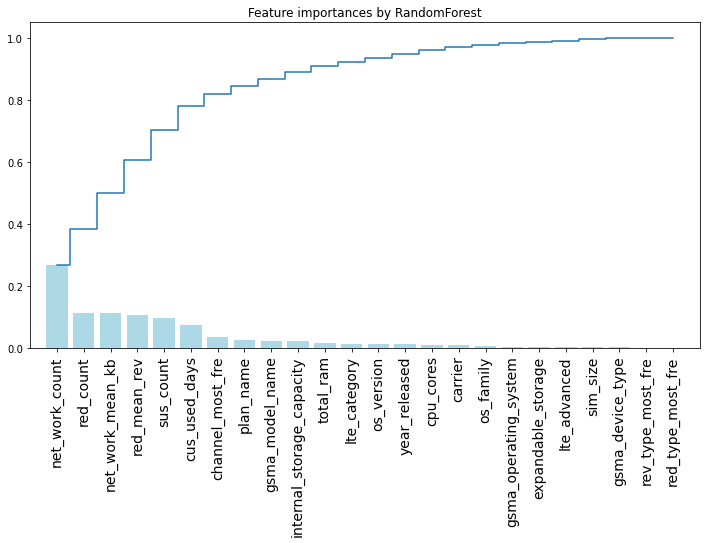

In [15]:
RFC = RandomForestClassifier(criterion='gini',max_depth=None,max_features='sqrt',n_estimators=200,min_samples_leaf=1,min_samples_split=2).fit(data_X,data_y)
import matplotlib.pyplot as plt
importances = RFC.feature_importances_
feat_names = data_X.columns
# 排序
indices = np.argsort(importances)[::-1]
# 绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [59]:
use_features = feat_names[indices][:10]

Index(['net_work_count', 'red_count', 'net_work_mean_kb', 'red_mean_rev',
       'sus_count', 'cus_used_days', 'channel_most_fre', 'plan_name',
       'gsma_model_name', 'internal_storage_capacity'],
      dtype='object')

In [17]:
importances

array([8.90017635e-03, 3.68587874e-03, 2.10131696e-03, 1.85589972e-03,
       2.88664305e-02, 4.91076545e-02, 3.98191080e-02, 1.50875952e-01,
       6.11033579e-03, 3.85049896e-02, 8.07364000e-02, 4.80395745e-05,
       6.51749281e-03, 5.96891291e-03, 2.82878163e-01, 1.22478540e-01,
       1.37922197e-01, 1.74770122e-03, 5.86824758e-04, 1.78563164e-04,
       2.32668022e-04, 5.76909200e-04, 3.37280250e-03, 1.13668113e-02,
       1.55602339e-02])

In [123]:
use_features = feat_names[indices]
use_features

Index(['net_work_count', 'red_count', 'net_work_mean_kb', 'red_mean_rev',
       'sus_count', 'cus_used_days', 'channel_most_fre', 'plan_name',
       'gsma_model_name', 'internal_storage_capacity', 'total_ram',
       'lte_category', 'year_released', 'os_version', 'cpu_cores', 'carrier',
       'os_family', 'gsma_operating_system', 'expandable_storage', 'sim_size',
       'lte_advanced', 'gsma_device_type', 'rev_type_most_fre',
       'red_type_most_fre'],
      dtype='object')

In [153]:
#store the model
from joblib import dump, load
dump(CV_rfc, 'CV_rfc_1.joblib')

['CV_rfc_1.joblib']

In [164]:
#Adaboost
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10, 50, 100, 500],
              'learning_rate' : [ 0.01, 0.1, 1.0]
             }
ABC = AdaBoostClassifier()
CV_abc = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 10,n_jobs=-1,scoring = 'f1')
CV_abc.fit(data_X,data_y)
CV_abc.best_params_

AttributeError: 'NoneType' object has no attribute 'set_params'

In [ ]:
num = 
corr_df=train[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

In [ ]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
#DT
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,None]
}

grid=GridSearchCV(classifier, param_grid=param_dist, cv=10, n_jobs=-1)

In [98]:
scores

{'fit_time': array([0.35578537, 0.36464357, 0.35024738, 0.36124158, 0.40056062,
        0.36154866, 0.38162875, 0.36229515, 0.36409283, 0.47397733]),
 'score_time': array([0.00865555, 0.00872803, 0.00849414, 0.00944614, 0.00974679,
        0.00897741, 0.00831795, 0.00841761, 0.00955963, 0.01258183]),
 'test_f1': array([0.69802731, 0.70685757, 0.71700992, 0.71310861, 0.71290082,
        0.73318216, 0.71829916, 0.71659325, 0.71588367, 0.70518519]),
 'train_f1': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.69381599, 0.69791667, 0.71646341, 0.7       , 0.696793  ,
        0.72713643, 0.71558245, 0.69121813, 0.70072993, 0.68489209]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.70229008, 0.71603053, 0.71755725, 0.72671756, 0.72977099,
        0.73932927, 0.72103659, 0.74390244, 0.73170732, 0.72671756]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_accuracy': array([0.79442149, 0.7990

In [76]:
def get_score(model):
    y_pred=model.predict(X_test)
    f1 =f1_score(y_test, y_pred)
    accu = accuracy_score(y_test,y_pred)
    return f1,accu

In [78]:
data_folder='s3://tf-trachack-data/212/'
data_path = data_folder+"data/" + 'dev' + '/'
upgrades=pd.read_csv(data_path + "upgrades.csv")

In [84]:
#base accuracy
q = len(data_y[data_y == 0]) / len(data_y)
q

0.6614494550338343

In [91]:
#base f1 score
# 2q/(q+1)
f1 = 2q/(q+1)
f1

0.5058464863196079

In [89]:
data_y.values

array([0, 1, 0, ..., 1, 0, 1])

In [77]:
#
for i in range(len(names)):
    f1,accu = get_score(clfs[i])
    print(f'The model {names[i]} f1 is {f1}, accu is {accu}')
    print()

The model DTC f1 is 0.7190839694656488, accu is 0.8099173553719008

The model RFC f1 is 0.7558685446009389, accu is 0.8657024793388429

The model ABC f1 is 0.7545076282940361, accu is 0.8628615702479339

The model LR f1 is 0.06073752711496746, accu is 0.6645144628099173

The model MLP f1 is 0.3022508038585209, accu is 0.6637396694214877

The model SVM f1 is 0.019593067068575734, accu is 0.6639979338842975



In [ ]:
pred_train = DTC.predict(X_train)
pred_test = DTC.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':list(range(2,96))}
DTC = DecisionTreeClassifier()
clf = GridSearchCV(DTC,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
print(f'The train accuracy is {accuracy_score(y_train,pred_train)}')
print(f'The test accuracy is {accuracy_score(y_test,pred_test)}')


In [62]:
X_train.describe()

,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,channel_most_fre_HANDSET,channel_most_fre_IVR,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
count,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,...,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000
mean,0.063223,0.071565,0.207516,0.022670,0.995764,0.000568,0.001550,0.132755,0.004339,0.412160,...,0.005591,0.016104,0.013430,0.002495,0.002160,0.025205,0.060767,0.054458,0.025998,0.026583
std,0.049933,0.070442,0.192379,0.088697,0.064946,0.023831,0.039336,0.339318,0.065730,0.492236,...,0.028260,0.043138,0.042816,0.008113,0.008160,0.039249,0.069335,0.061167,0.041560,0.038422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019934,0.051854,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001137,0.000377,0.000471,0.000223,0.003272,0.018035,0.017091,0.004875,0.005755
50%,0.053156,0.066286,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004641,0.002530,0.001290,0.000900,0.011703,0.040777,0.037014,0.013561,0.015174
75%,0.100689,0.072352,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.014614,0.010233,0.002857,0.002382,0.030661,0.078191,0.068976,0.030615,0.032346
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_val.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [56]:
Y_train.replace({'no':0,'yes':1})

0        0
1        1
2        0
3        1
4        1
        ..
19354    0
19355    1
19356    1
19357    0
19358    1
Name: upgrade, Length: 19359, dtype: int64

In [ ]:
df.replace({0: 10, 1: 100})

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   red_count                            19359 non-null  float64
 1   red_mean_rev                         19359 non-null  float64
 2   channel_unique                       19359 non-null  float64
 3   red_type_unique                      19359 non-null  float64
 4   red_type_most_fre_MPPAID             19359 non-null  float64
 5   red_type_most_fre_PAID               19359 non-null  float64
 6   red_type_most_fre_Replacement        19359 non-null  float64
 7   channel_most_fre_APP                 19359 non-null  float64
 8   channel_most_fre_HANDSET             19359 non-null  float64
 9   channel_most_fre_IVR                 19359 non-null  float64
 10  channel_most_fre_RTR                 19359 non-null  float64
 11  channel_most_fre_SMS        

In [55]:
Y_train

0         no
1        yes
2         no
3        yes
4        yes
        ... 
19354     no
19355    yes
19356    yes
19357     no
19358    yes
Name: upgrade, Length: 19359, dtype: object

In [51]:
data_val.columns

Index(['line_id', 'red_count', 'red_mean_rev', 'channel_unique',
       'red_type_unique', 'red_type_most_fre_MPPAID', 'red_type_most_fre_PAID',
       'red_type_most_fre_Replacement', 'channel_most_fre_APP',
       'channel_most_fre_HANDSET', 'channel_most_fre_IVR',
       'channel_most_fre_RTR', 'channel_most_fre_SMS', 'channel_most_fre_TAS',
       'channel_most_fre_WARP', 'channel_most_fre_WEB',
       'channel_most_fre_WEBCSR', 'available_online_Y',
       'available_online_is_miss', 'device_type_Others',
       'device_type_SMARTPHONE', 'device_type_is_miss',
       'device_lock_state_UNLOCKABLE', 'device_lock_state_is_miss',
       'data_capable_1.0', 'bluetooth_Y', 'bluetooth_is_miss',
       'battery_removable_Y', 'battery_removable_is_miss', 'fm_radio_Y',
       'fm_radio_is_miss', 'display_description_IPHONE 6S',
       'display_description_LG L722DL', 'display_description_Others',
       'display_description_Samsung S506DL', 'display_description_is_miss',
       'cus_used_d

In [49]:
len(data_train.columns[3:])

62

In [44]:
len(data_val.columns[1:])

62

In [31]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              19359 non-null  object 
 1   upgrade_date                         19359 non-null  object 
 2   upgrade                              19359 non-null  object 
 3   red_count                            19359 non-null  float64
 4   red_mean_rev                         19359 non-null  float64
 5   channel_unique                       19359 non-null  float64
 6   red_type_unique                      19359 non-null  float64
 7   red_type_most_fre_MPPAID             19359 non-null  float64
 8   red_type_most_fre_PAID               19359 non-null  float64
 9   red_type_most_fre_Replacement        19359 non-null  float64
 10  channel_most_fre_APP                 19359 non-null  float64
 11  channel_most_fre_HANDSET    

In [13]:
data_val.columns[1:]

Index(['red_count', 'red_mean_rev', 'channel_unique', 'red_type_unique',
       'red_type_most_fre_LL BILL', 'red_type_most_fre_MPPAID',
       'red_type_most_fre_PAID', 'red_type_most_fre_Replacement',
       'channel_most_fre_APP', 'channel_most_fre_HANDSET',
       'channel_most_fre_IVR', 'channel_most_fre_RTR', 'channel_most_fre_SMS',
       'channel_most_fre_TAS', 'channel_most_fre_VMBC',
       'channel_most_fre_WARP', 'channel_most_fre_WEB',
       'channel_most_fre_WEBCSR', 'available_online_Y',
       'available_online_is_miss', 'device_type_Others',
       'device_type_SMARTPHONE', 'device_type_is_miss',
       'device_lock_state_UNLOCKABLE', 'device_lock_state_is_miss',
       'data_capable_1.0', 'bluetooth_Y', 'bluetooth_is_miss',
       'battery_removable_Y', 'battery_removable_is_miss', 'fm_radio_Y',
       'fm_radio_is_miss', 'display_description_IPHONE 6S',
       'display_description_LG L722DL', 'display_description_Others',
       'display_description_Samsung S506DL',

In [ ]:
Y_train = data_train

In [4]:
data_val.head()

,line_id,red_count,red_mean_rev,channel_unique,red_type_unique,red_type_most_fre_LL BILL,red_type_most_fre_MPPAID,red_type_most_fre_PAID,red_type_most_fre_Replacement,channel_most_fre_APP,...,mean_hotspot_kb,mean_mms_in,mean_mms_out,mean_sms_in,mean_sms_out,mean_total_kb,mean_voice_count_in,mean_voice_count_total,mean_voice_min_in,mean_voice_min_out
0,a345b1ec-d999-47ed-8715-99d73797c8eb,0.343750,0.072165,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000872,0.000237,0.012822,0.011754,0.001293,0.017045,0.035513,0.045832,0.018568
1,2c8d27db-3ec7-4036-a70b-58098467071e,0.046875,0.163476,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.002608,0.000168,0.003904,0.003428,0.001087,0.000508,0.014588,0.000197,0.004587
2,992479f5-2a43-481b-9f26-a3b489d336c8,0.164062,0.075211,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.004670,0.004449,0.139339,0.130237,0.007121,0.060105,0.082680,0.018683,0.006547
3,20afe47b-2549-4019-8dfb-0c50d2514aae,0.125000,0.057611,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.001165,0.000120,0.015224,0.008857,0.003790,0.012247,0.064468,0.012884,0.017049
4,bcbdd8f3-12b2-4311-ba98-40d9a2e3133e,0.265625,0.090074,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.005199,0.027256,0.017265,0.002377,0.064312,0.014482,0.041124,0.009324,0.009494


In [6]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   line_id                              12744 non-null  object 
 1   red_count                            12744 non-null  float64
 2   red_mean_rev                         12744 non-null  float64
 3   channel_unique                       12744 non-null  float64
 4   red_type_unique                      12744 non-null  float64
 5   red_type_most_fre_LL BILL            12744 non-null  float64
 6   red_type_most_fre_MPPAID             12744 non-null  float64
 7   red_type_most_fre_PAID               12744 non-null  float64
 8   red_type_most_fre_Replacement        12744 non-null  float64
 9   channel_most_fre_APP                 12744 non-null  float64
 10  channel_most_fre_HANDSET             12744 non-null  float64
 11  channel_most_fre_IVR        